In [1]:
import scipy.io as sio

import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import welch, stft, butter, lfilter

In [2]:
def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype='lowpass')
    return b, a


def butter_lowpass_filter(data, highcut, fs, order=5):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, low, btype='highpass')
    return b, a


def butter_highpass_filter(data, lowcut, fs, order=5):
    b, a = butter_highpass(lowcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [32]:
def get_psd(tod, fs, nspectra, nperseg):
    """
    Chopping time series into pieces and get PSDs
    
    Parameters:
    tod    (1darray): Raw time series
    fs         (int): Sampling frequency of the original data
    nspectra   (int): Number of spectra to get out of the data
    nperseg    (int): Number of points of each segement to average over
                      for each calculated PSD
                      
    Returns:
    ndarray: Frequency bins of spectra
    ndarray: Estimated PSDs
    
    """
    
    npt = tod.size
    nsample = int(npt / nspectra)
    real_size = nspectra * nsample
    
    tod_reshaped = np.reshape(tod[0:real_size], (nspectra, nsample))    
    
    freq, psd = [], []
    for i in range(nspectra):
        f, p = welch(tod_reshaped[i], fs=fs, nperseg=nperseg)
        freq.append(f)
        psd.append(p)
    
    return np.asarray(freq), np.asarray(psd)

In [78]:
def peak_amplitude_stft(tod, fs, nperseg, driving_freq):
    
    ff, tt, Zxx = stft(tod, fs=fs, nperseg=nperseg)
    sig = np.abs(Zxx)
    f = np.where(ff==driving_freq)[0][0]

    # time, peak amplitude^2, sample frequency, sftp
    return tt, sig[f], ff, Zxx

## Plotting PSD

In [46]:
data_file = r'D:\\Experiment\\Charging\\20230717\\no_force.csv'
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

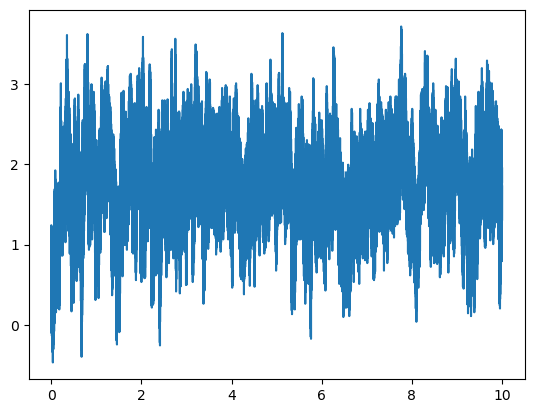

In [47]:
plt.plot(data[0], data[1])

In [48]:
fs

1000000

In [49]:
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
nperseg = data[1].size / 20 / 10

In [50]:
freq, psd = get_psd(data[1], fs, 20, nperseg)

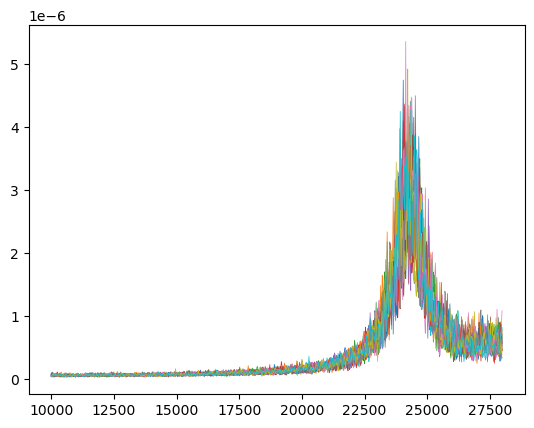

In [59]:
for i, f in enumerate(freq):
    plt.plot(f[500:1400], psd[i][500:1400], linewidth=0.5)
# plt.ylim
# plt.xlim(30e3, 40e3)

### Extract peak amplitude

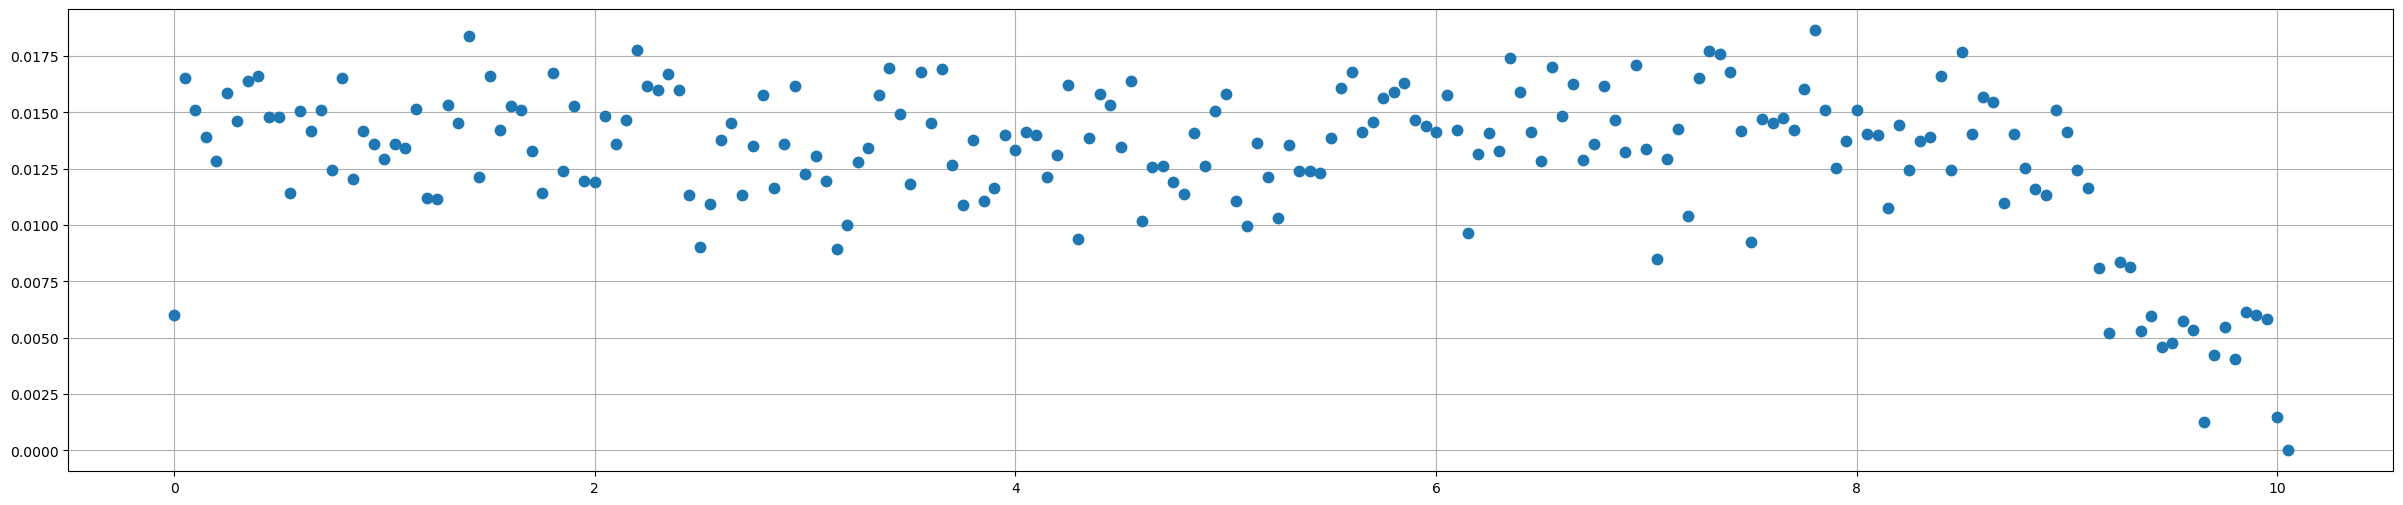

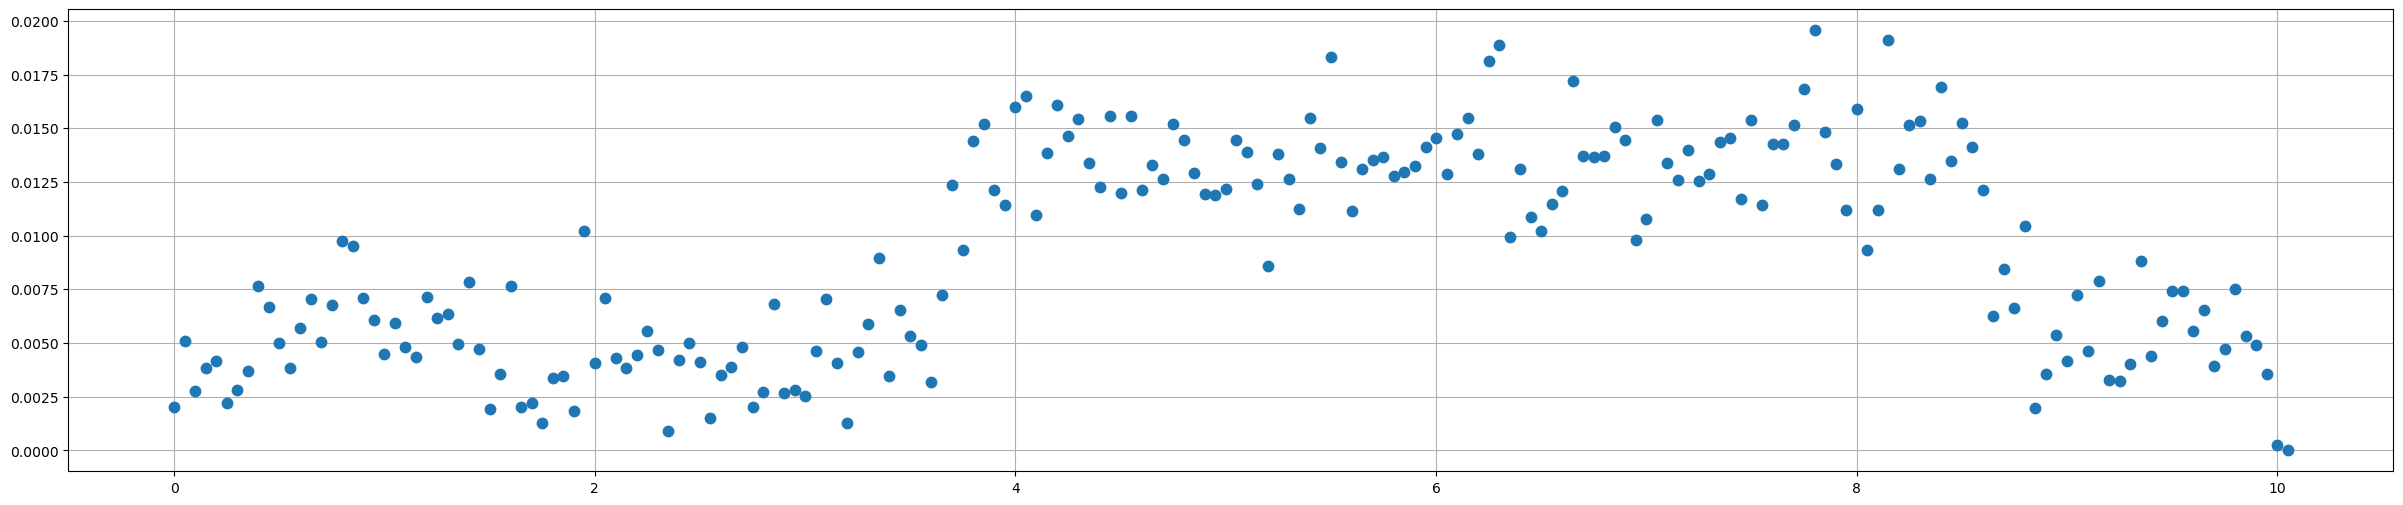

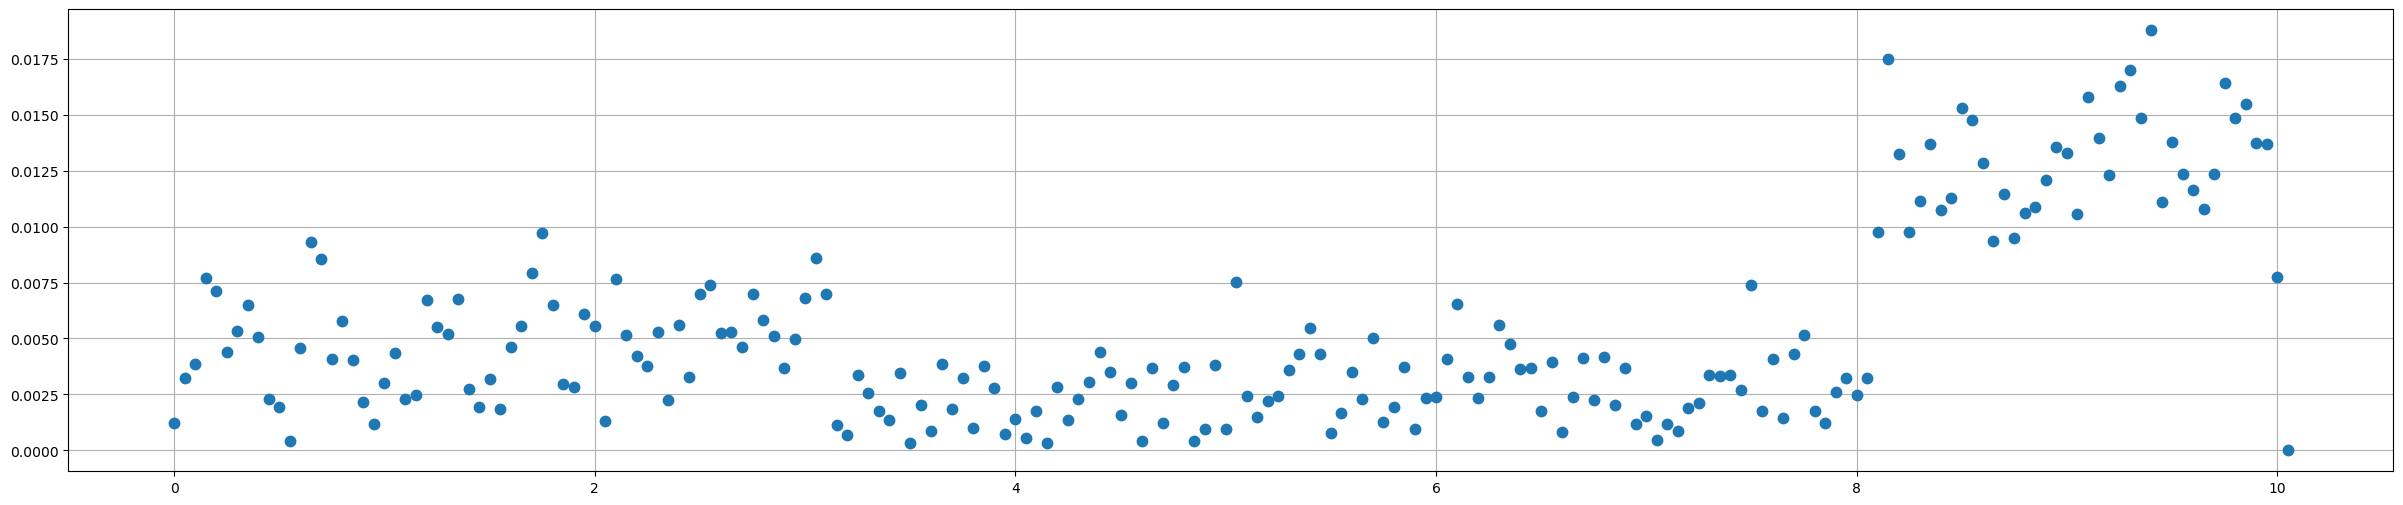

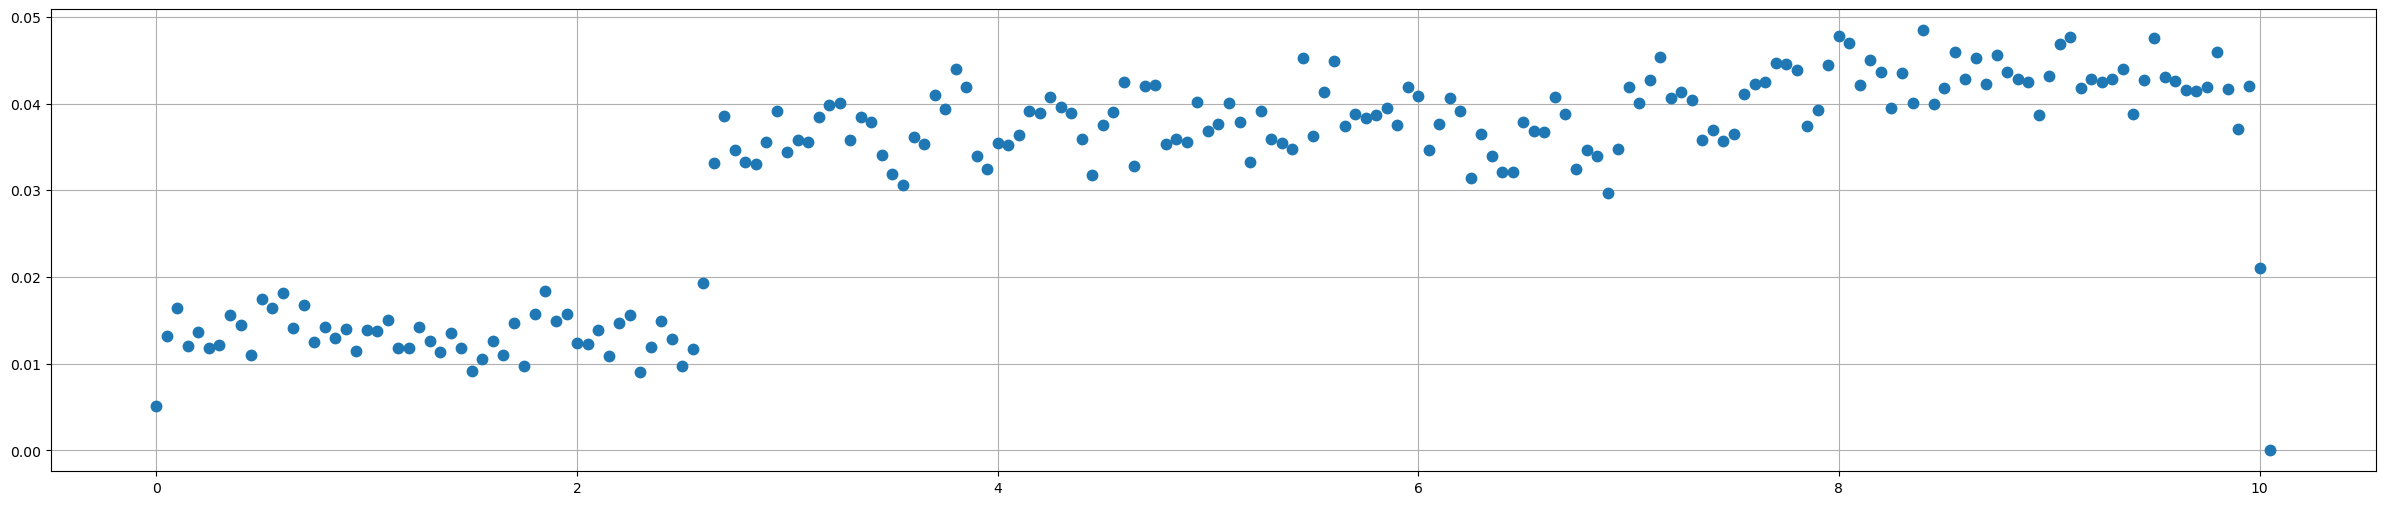

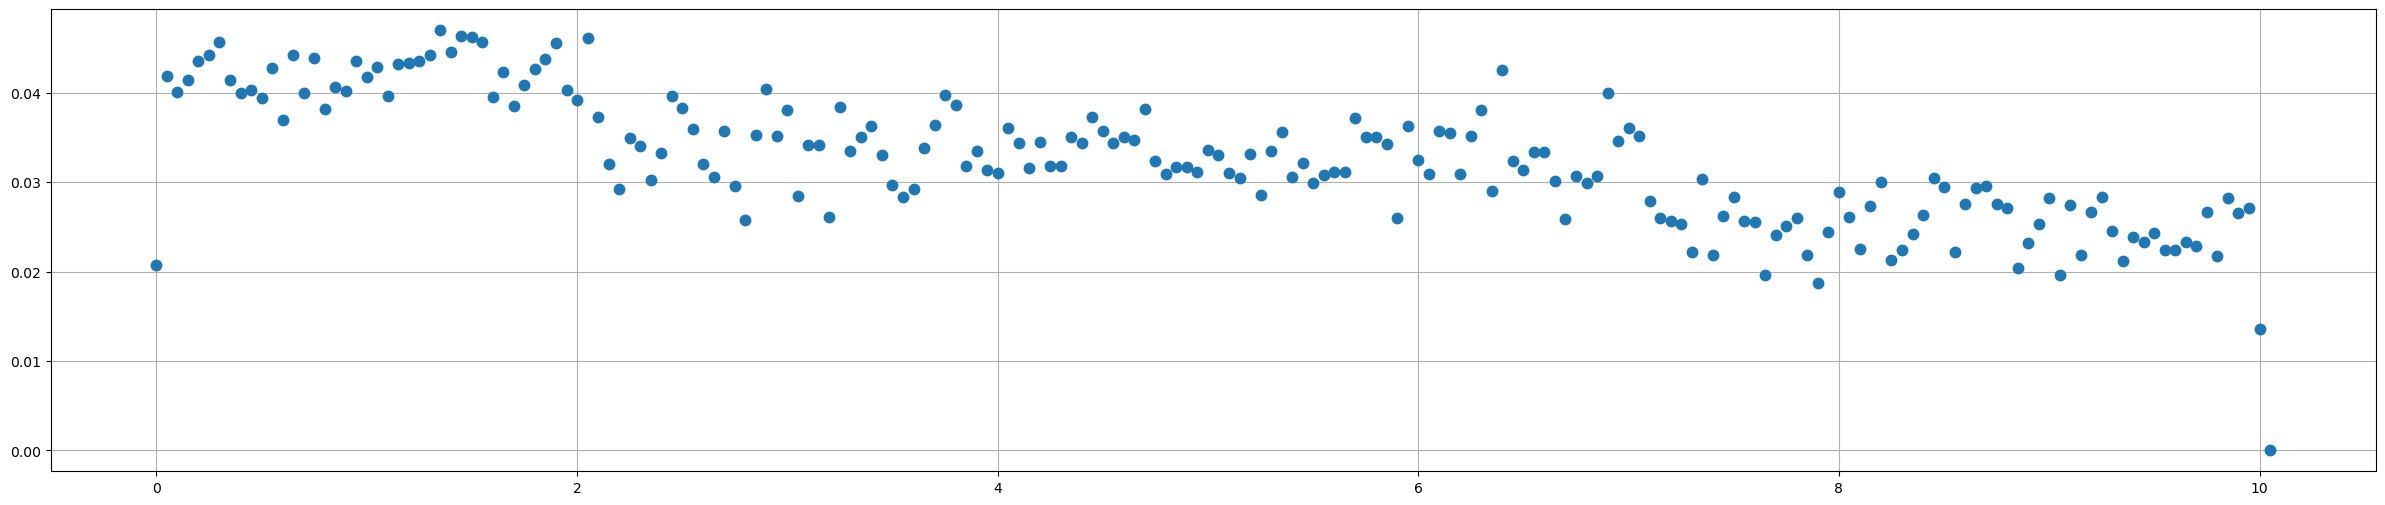

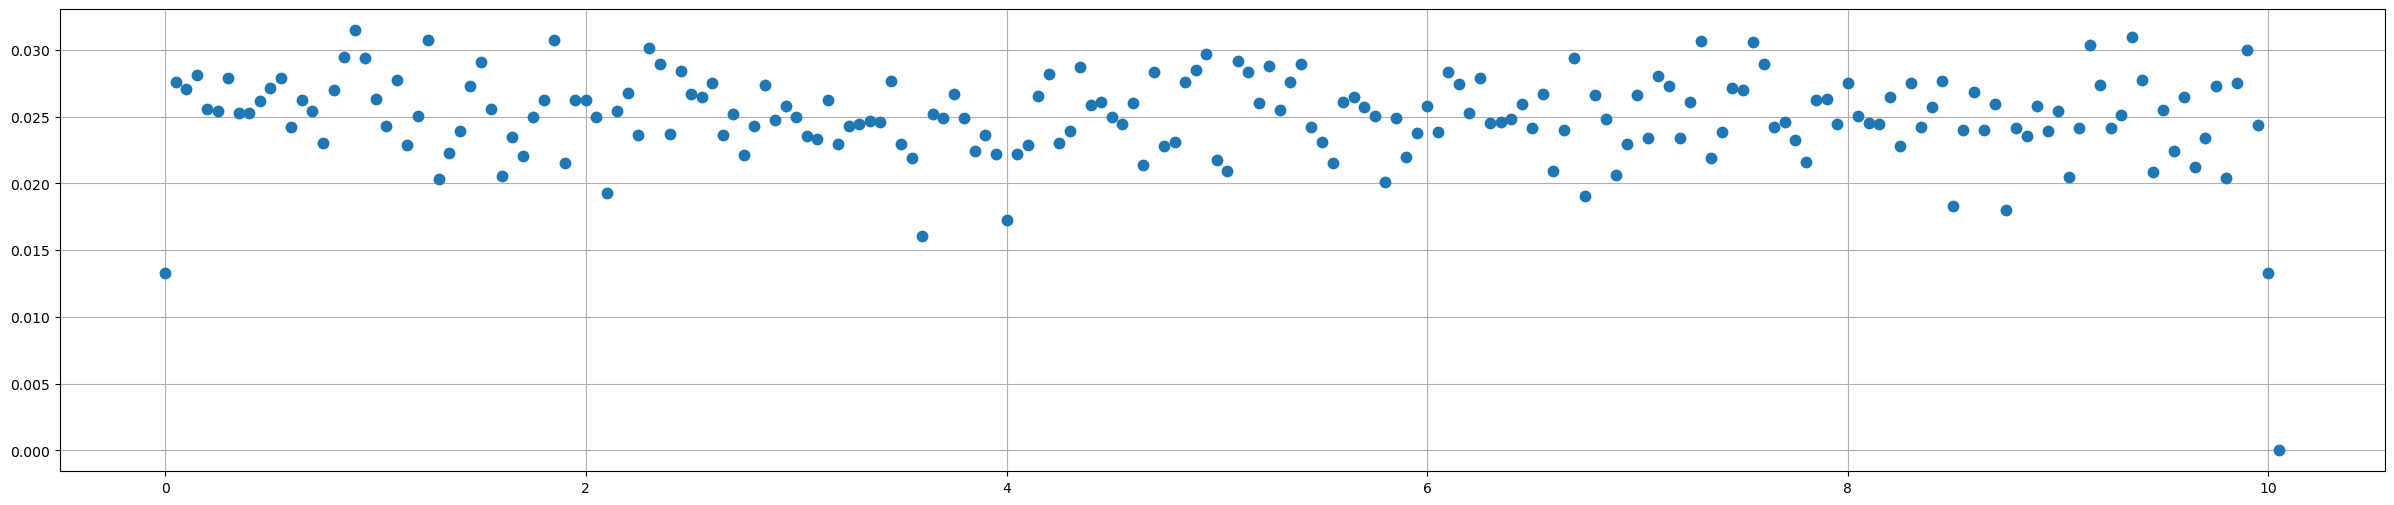

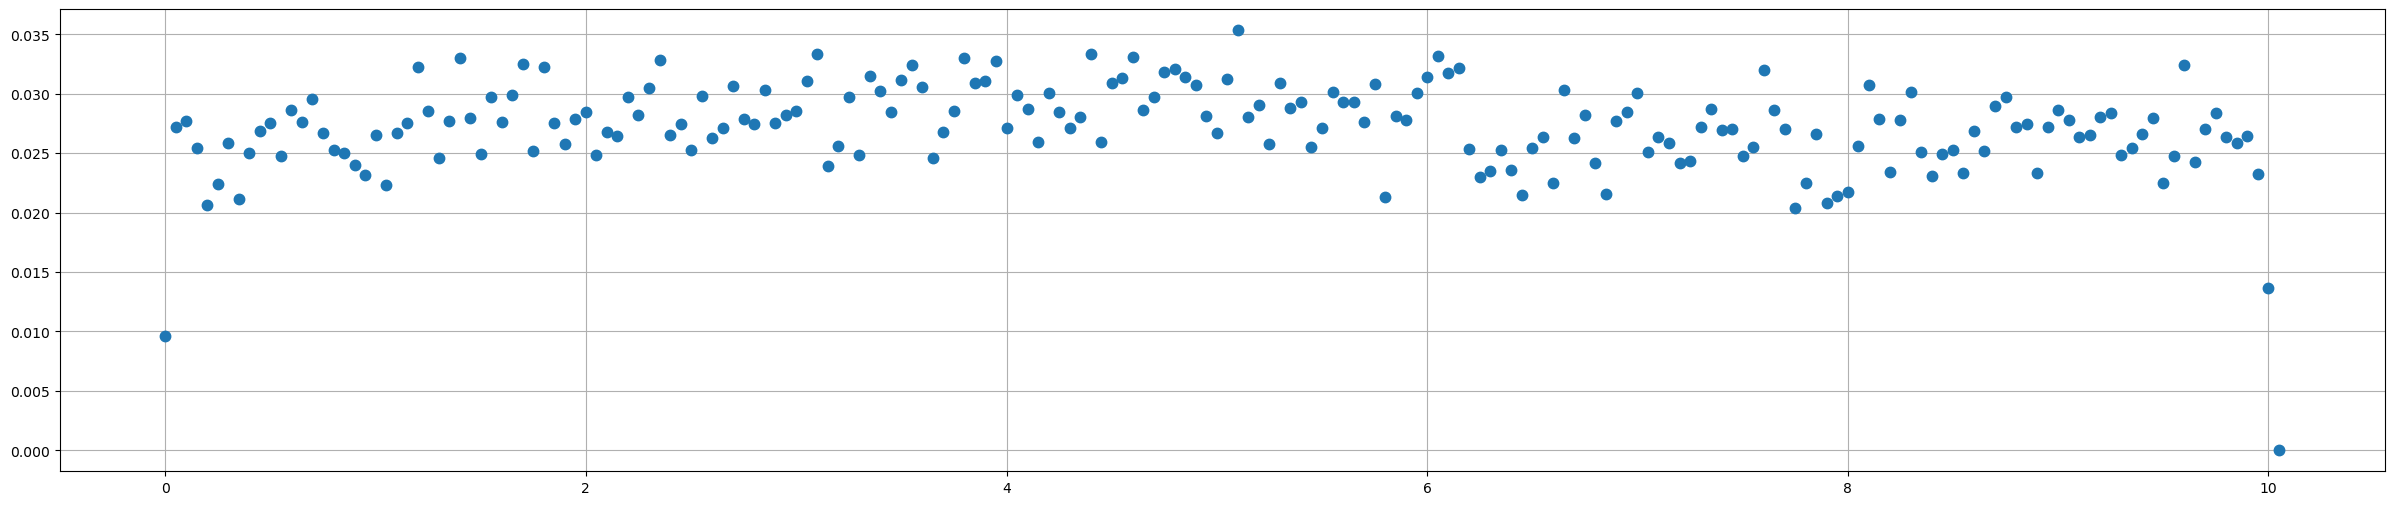

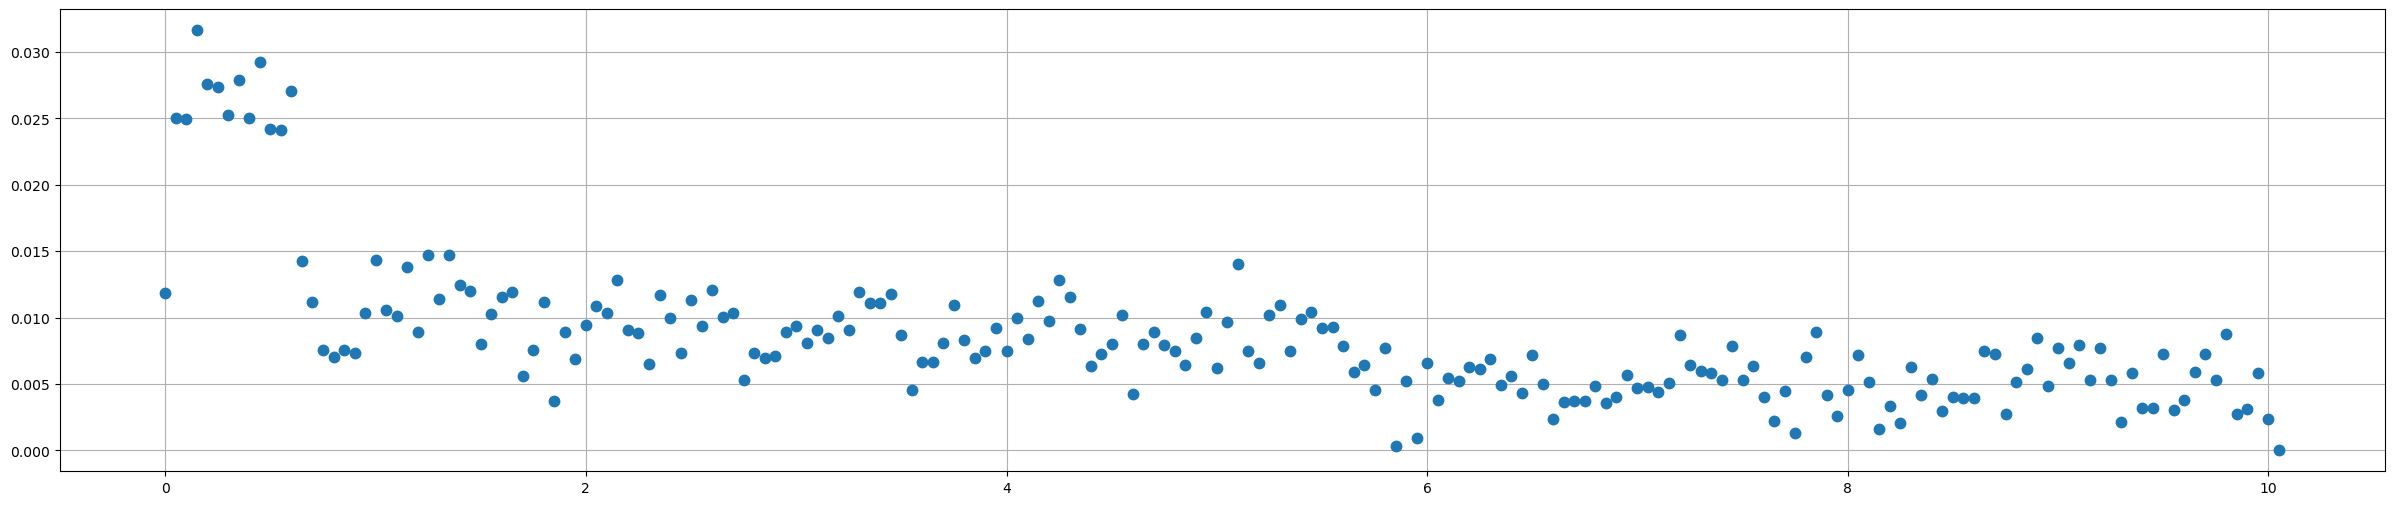

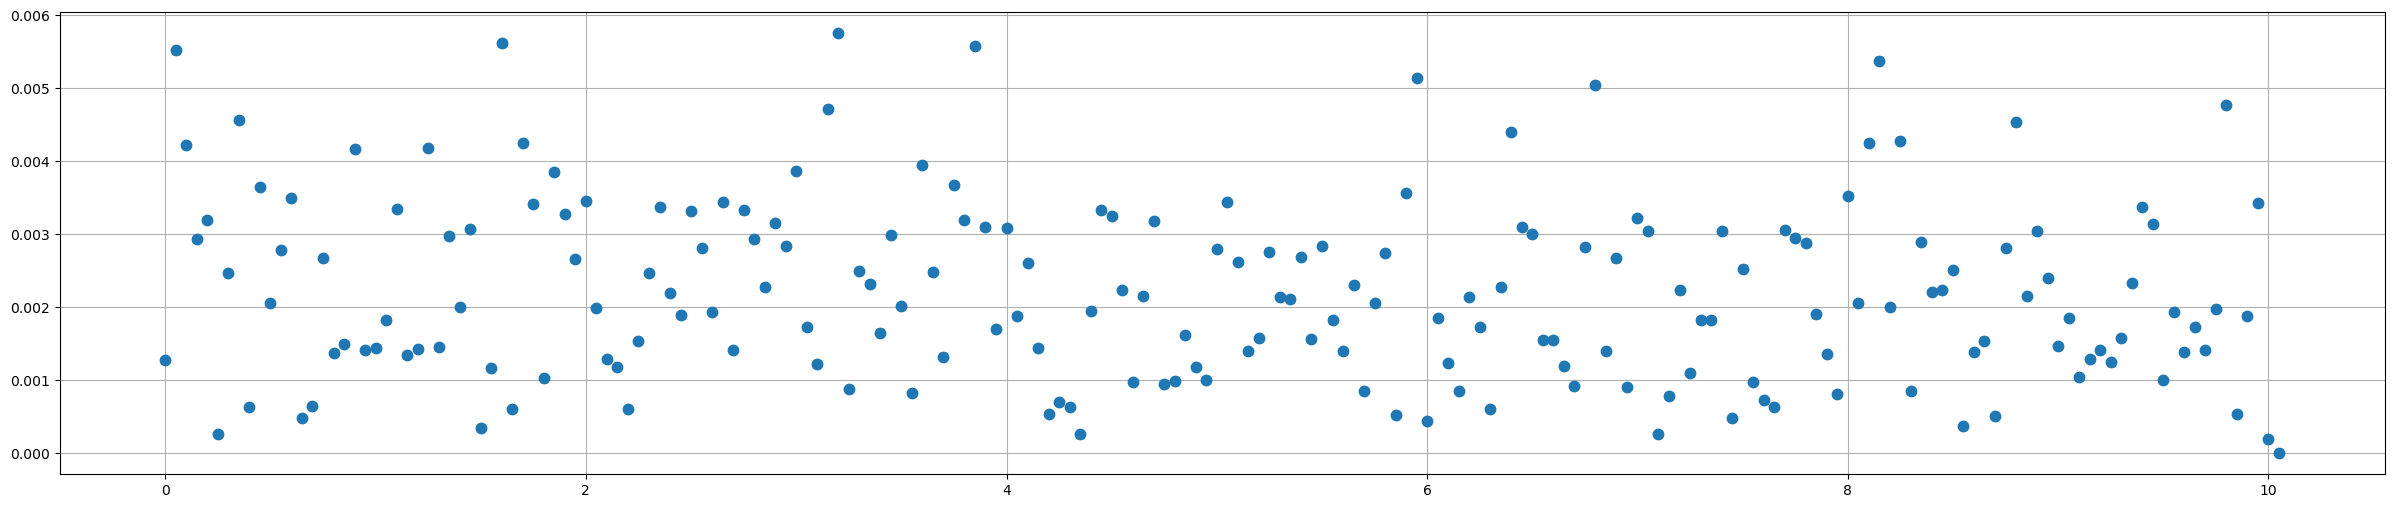

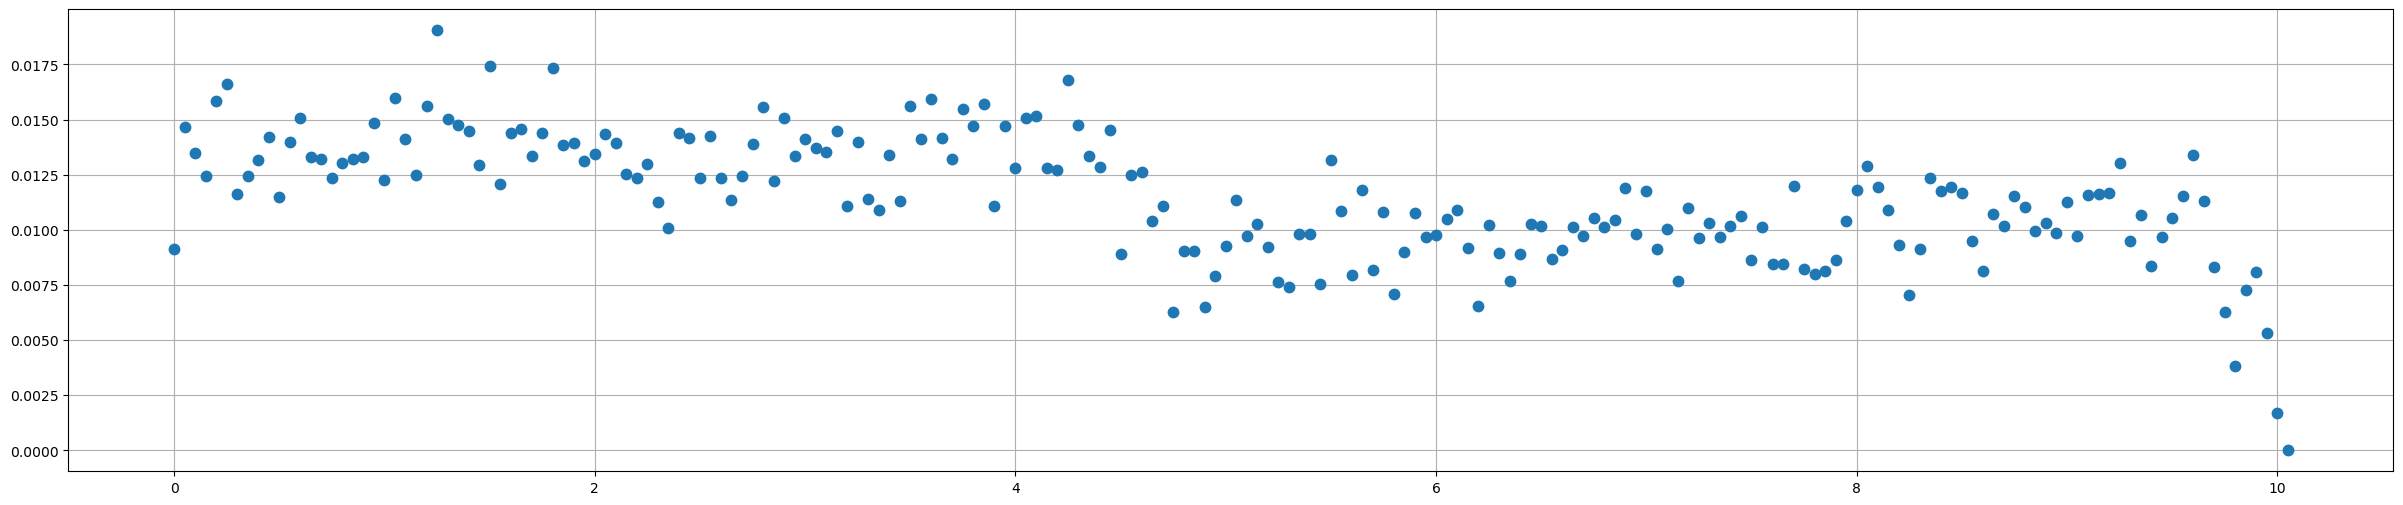

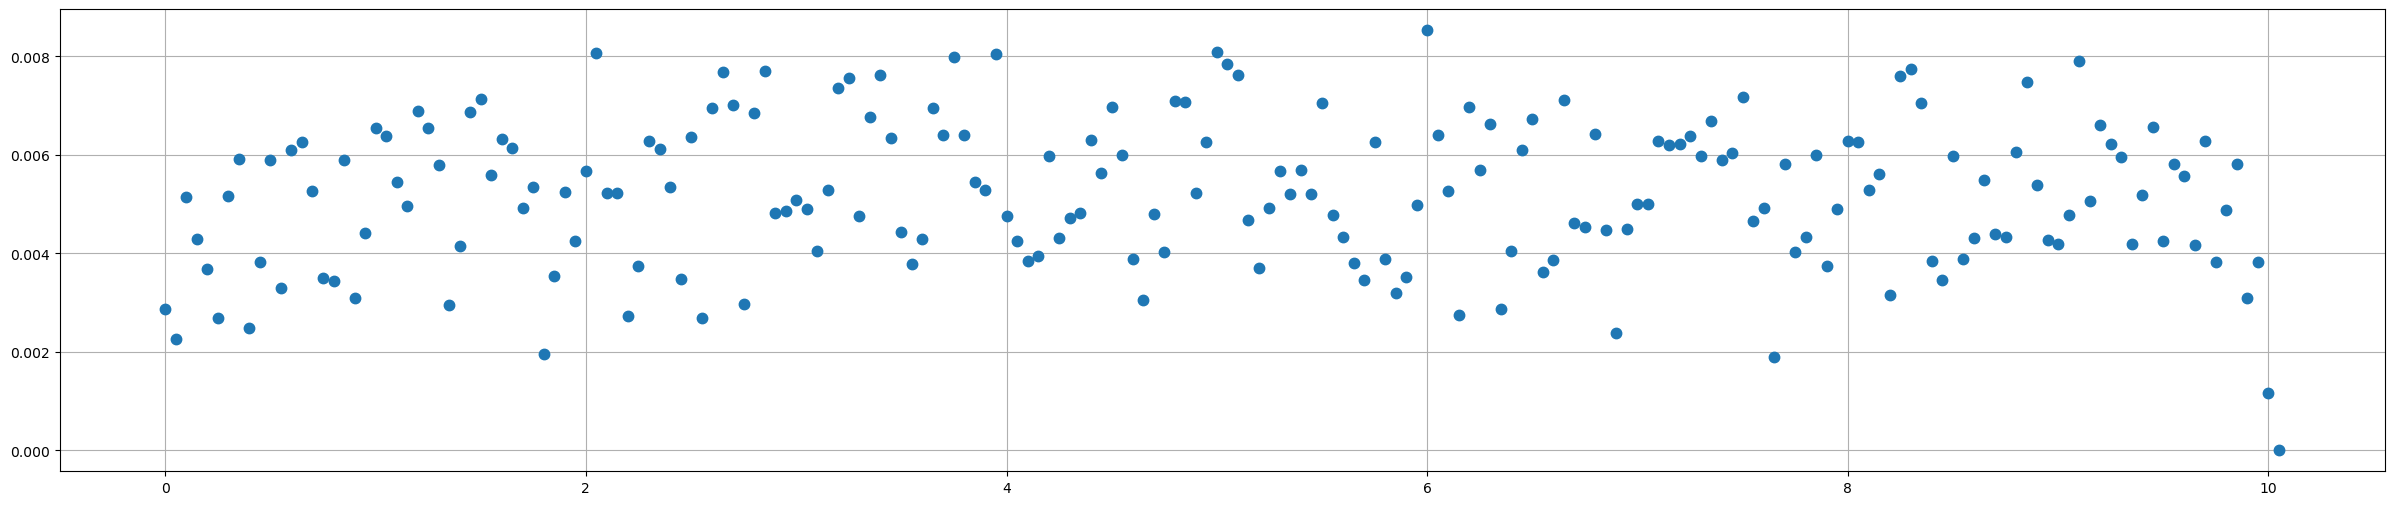

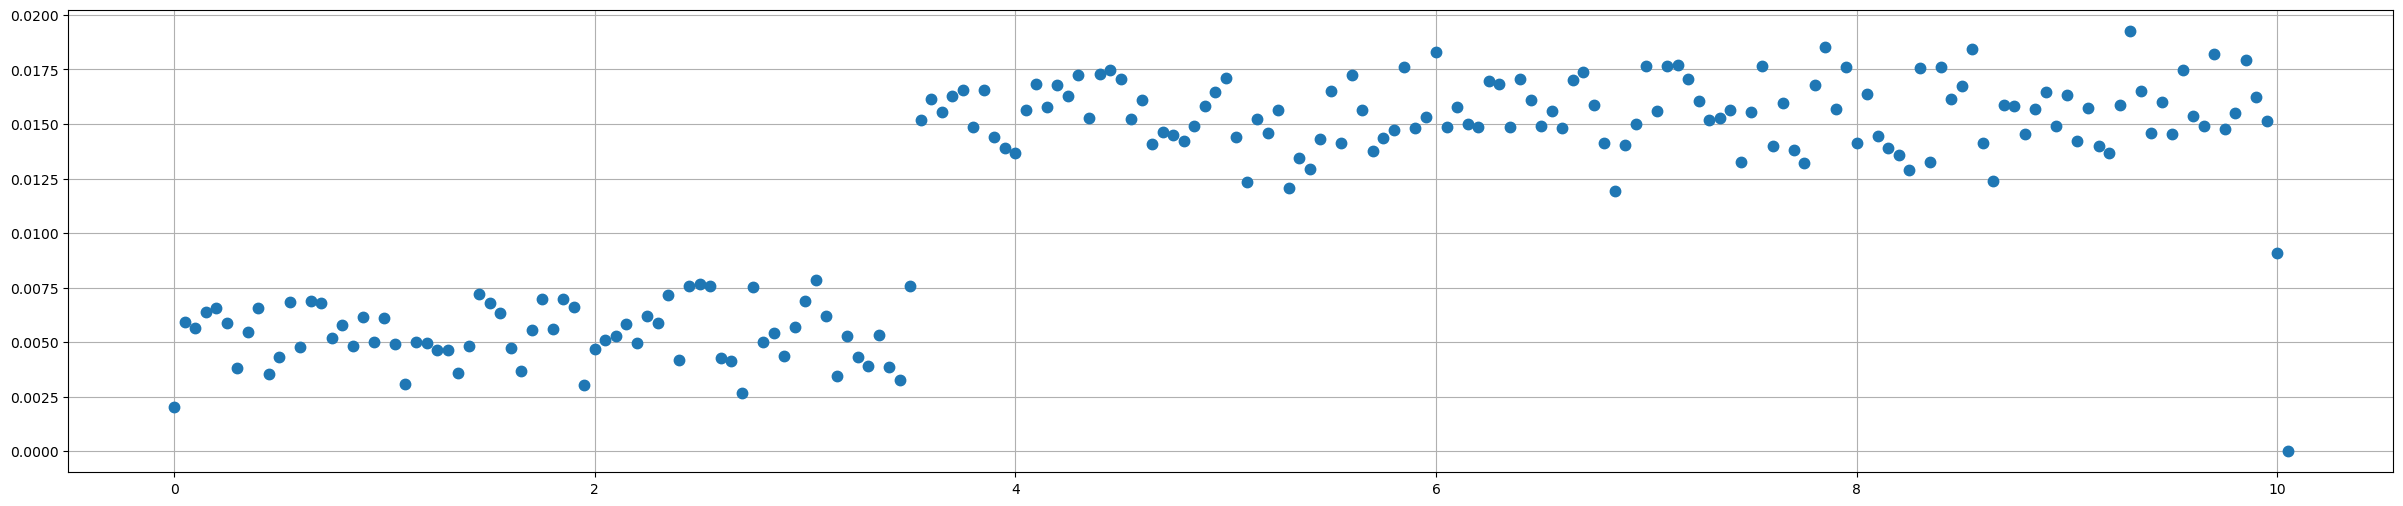

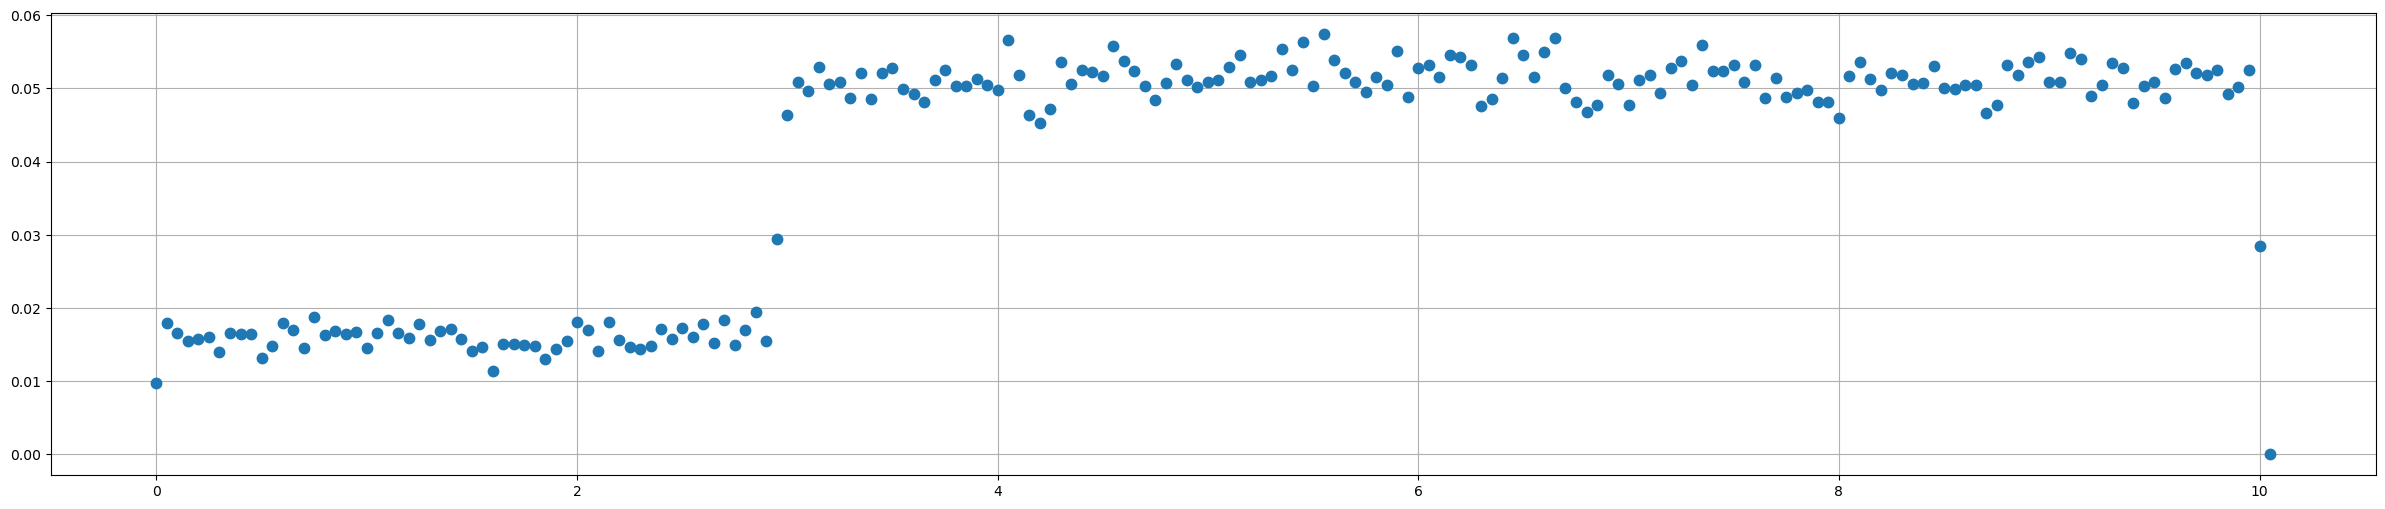

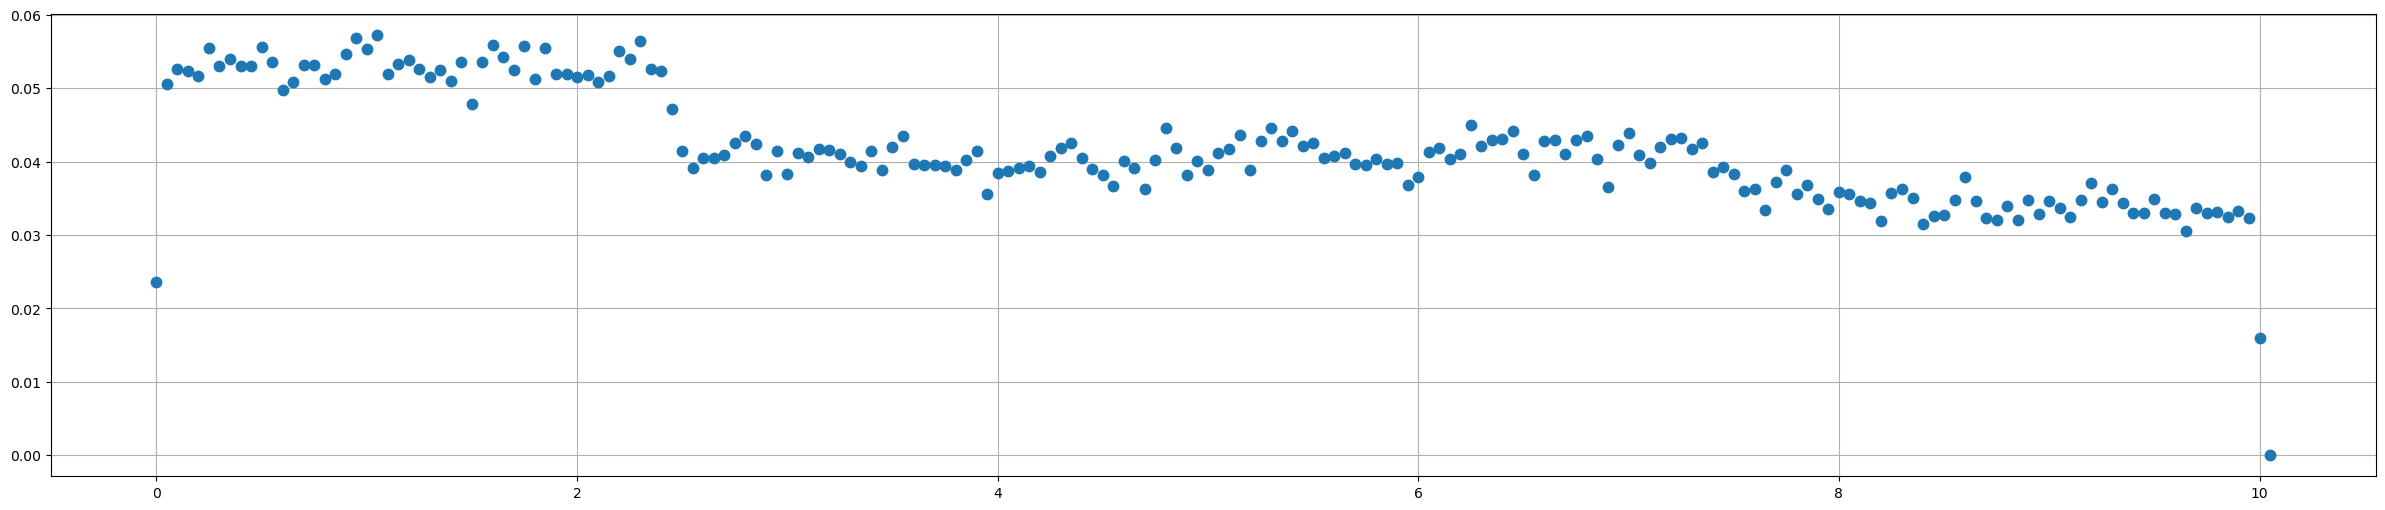

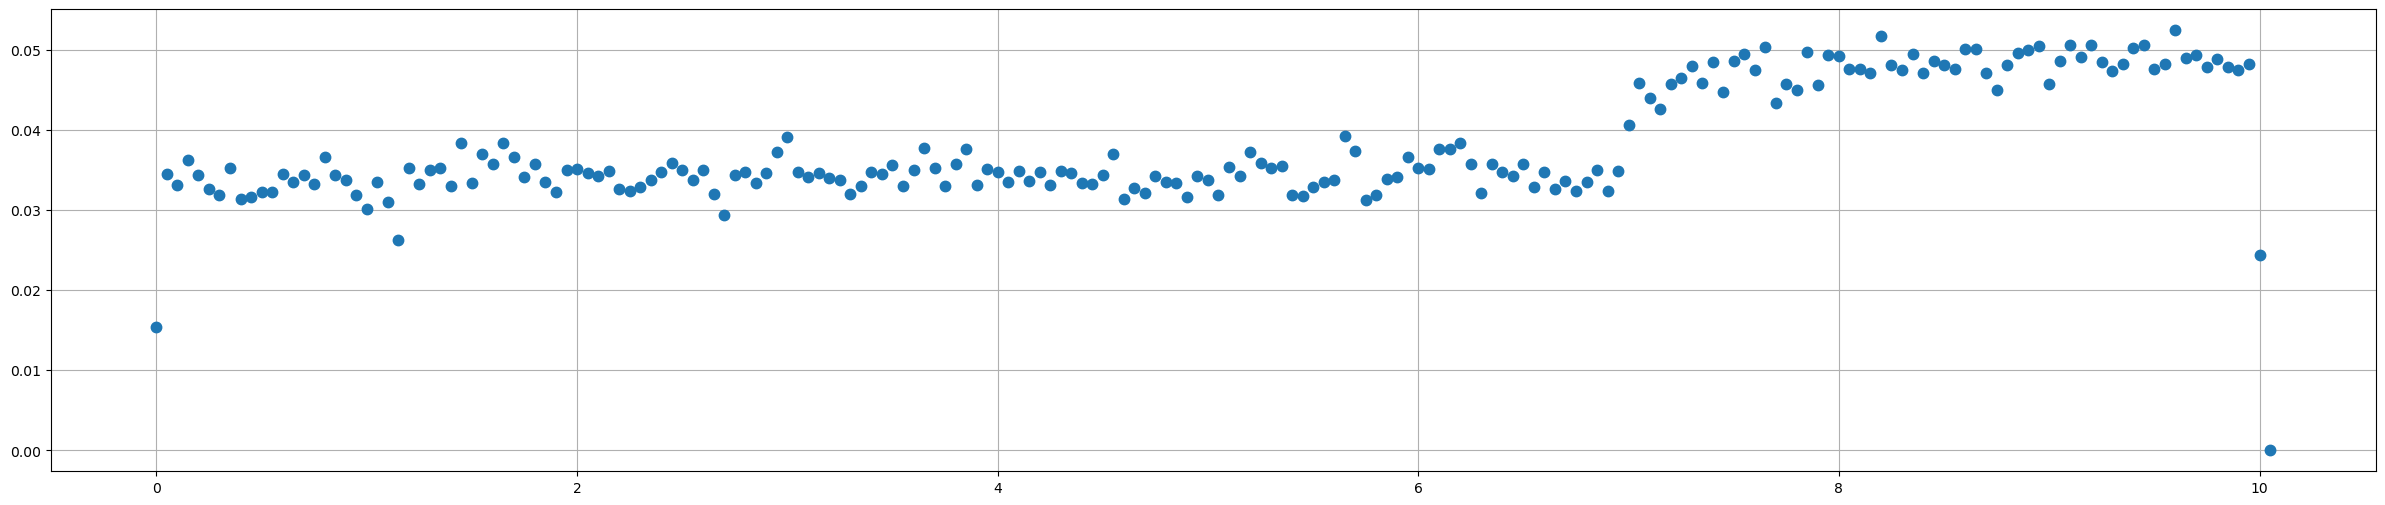

In [87]:
idx = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
drive_freq = 26000

amp = []
for i in range(15):
    data_file = rf'D:\Experiment\Charging\20230717\charging_1_7mbar_800mV_second_attempt\charging_1_7mbar_800mV_second_attempt_{idx[i]}.csv'
    data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T
    
    fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
    nperseg = fs / 10

    tt, sig, ff, Zxx = peak_amplitude_stft(data[1], fs, nperseg, drive_freq)
    amp.append(sig[2:-3]) # Excluding first and last few ill behaved amplitudes
    
    fig, ax = plt.subplots(figsize = (30, 6))
    ax.grid()
    ax.plot(tt, sig, '.', markersize=15)

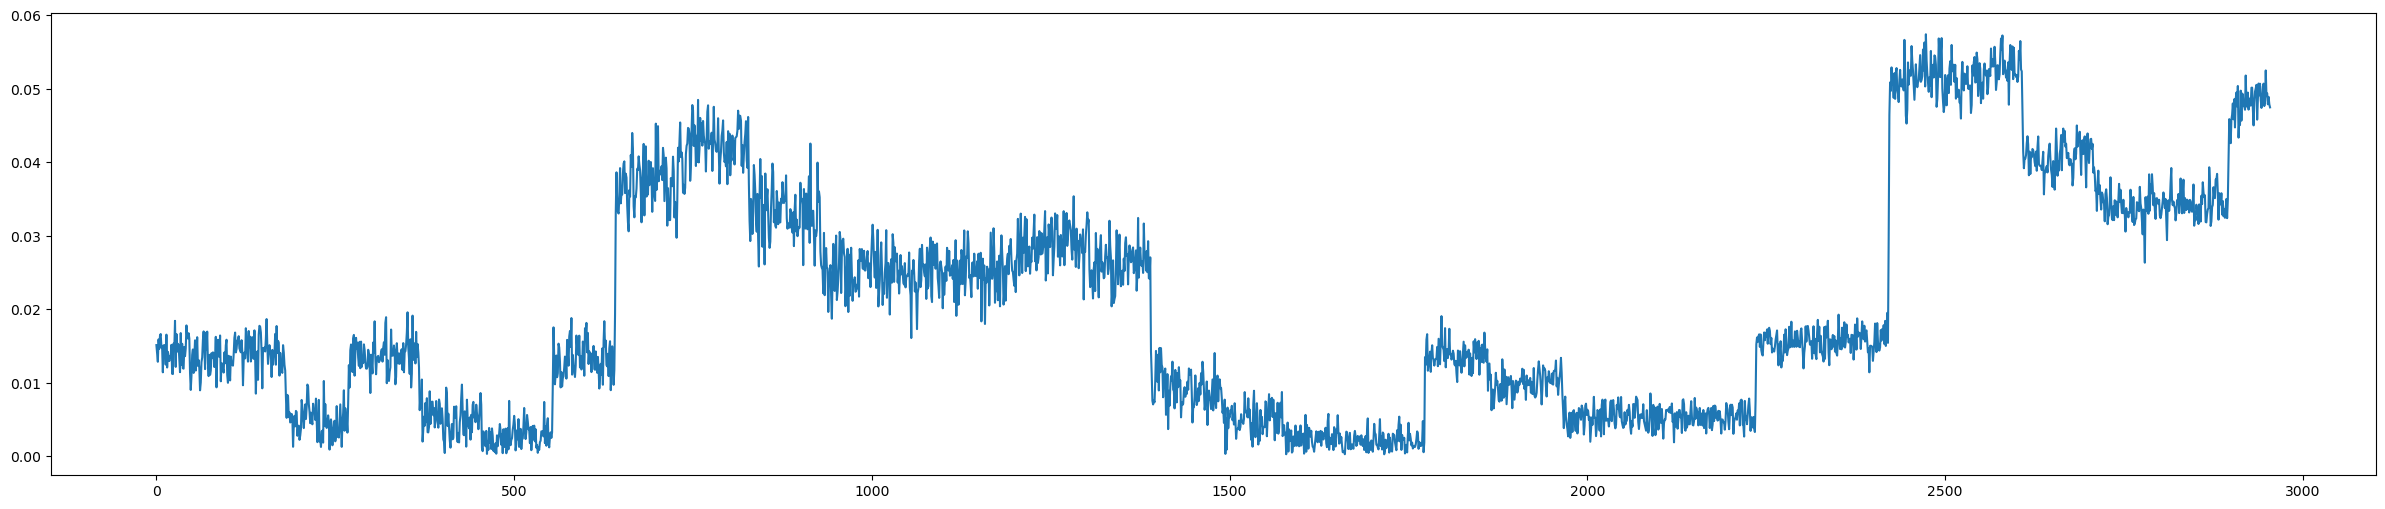

In [94]:
fig, ax = plt.subplots(figsize = (30, 6))

ax.plot(np.asarray(amp).flatten())

(array([171., 233., 246., 188., 110., 134., 170., 230., 148.,  47.,  20.,
         48.,  90., 116., 106.,  69.,  89., 103., 112.,  52.,  75.,  66.,
         57.,  32.,  35.,  45.,  63.,  63.,  23.,  14.]),
 array([0.00025754, 0.00216177, 0.004066  , 0.00597024, 0.00787447,
        0.0097787 , 0.01168293, 0.01358716, 0.01549139, 0.01739562,
        0.01929985, 0.02120408, 0.02310831, 0.02501254, 0.02691677,
        0.028821  , 0.03072523, 0.03262946, 0.03453369, 0.03643792,
        0.03834215, 0.04024638, 0.04215061, 0.04405485, 0.04595908,
        0.04786331, 0.04976754, 0.05167177, 0.053576  , 0.05548023,
        0.05738446]),
 <BarContainer object of 30 artists>)

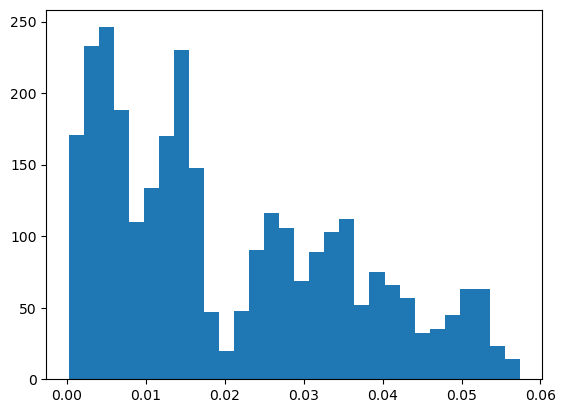

In [92]:
counts, bins = np.histogram(amp, bins=30)
plt.hist(bins[:-1], bins, weights=counts)

Try taking longer time traces to figure out the charge states that each amplitude corresonds to

In [107]:
drive_freq = 26000

data_file = r"D:\Experiment\Charging\20230717\charging_1_8mbar_800mV_long.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

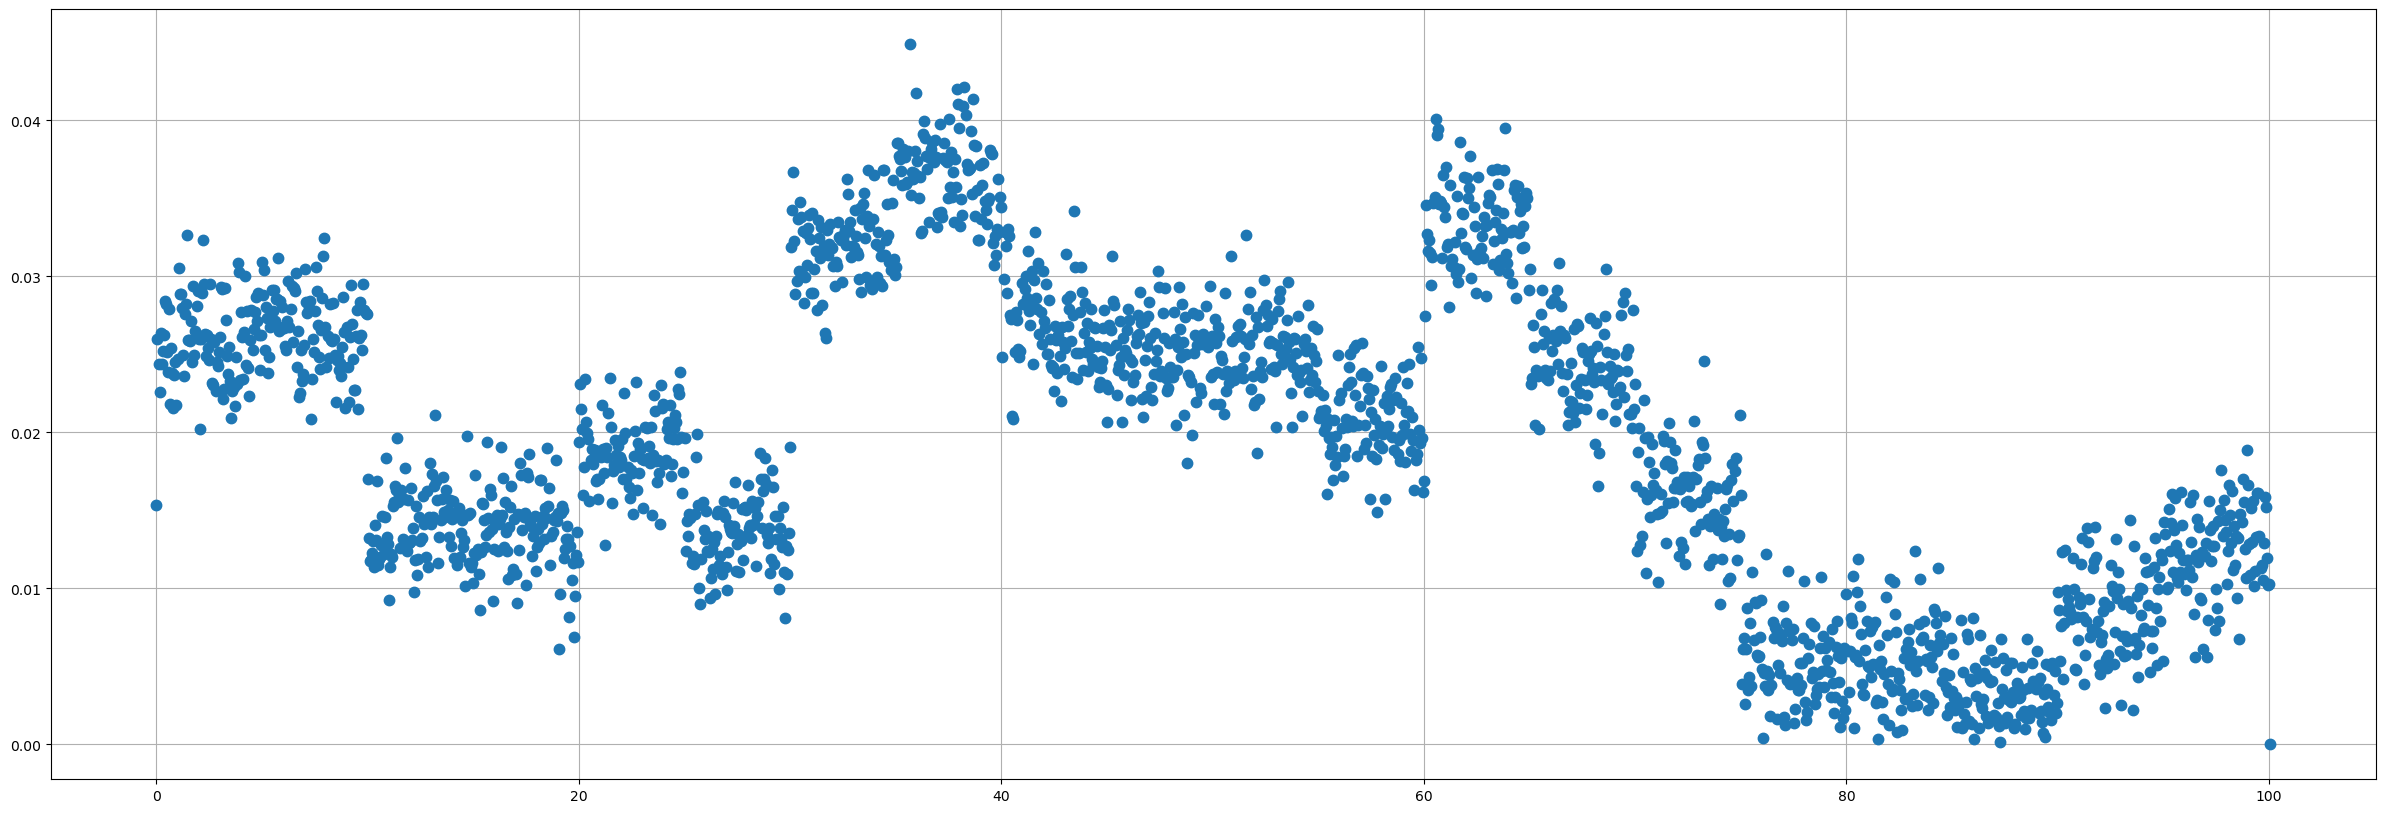

In [122]:
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
nperseg = fs / 10

tt, sig, ff, Zxx = peak_amplitude_stft(data[1], fs, nperseg, drive_freq)

fig, ax = plt.subplots(figsize = (30, 10))
ax.grid()
ax.plot(tt, sig, '.', markersize=15)

In [123]:
drive_freq = 26000

data_file = r"D:\Experiment\Charging\20230717\charging_1_8mbar_800mV_long_sec_1.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

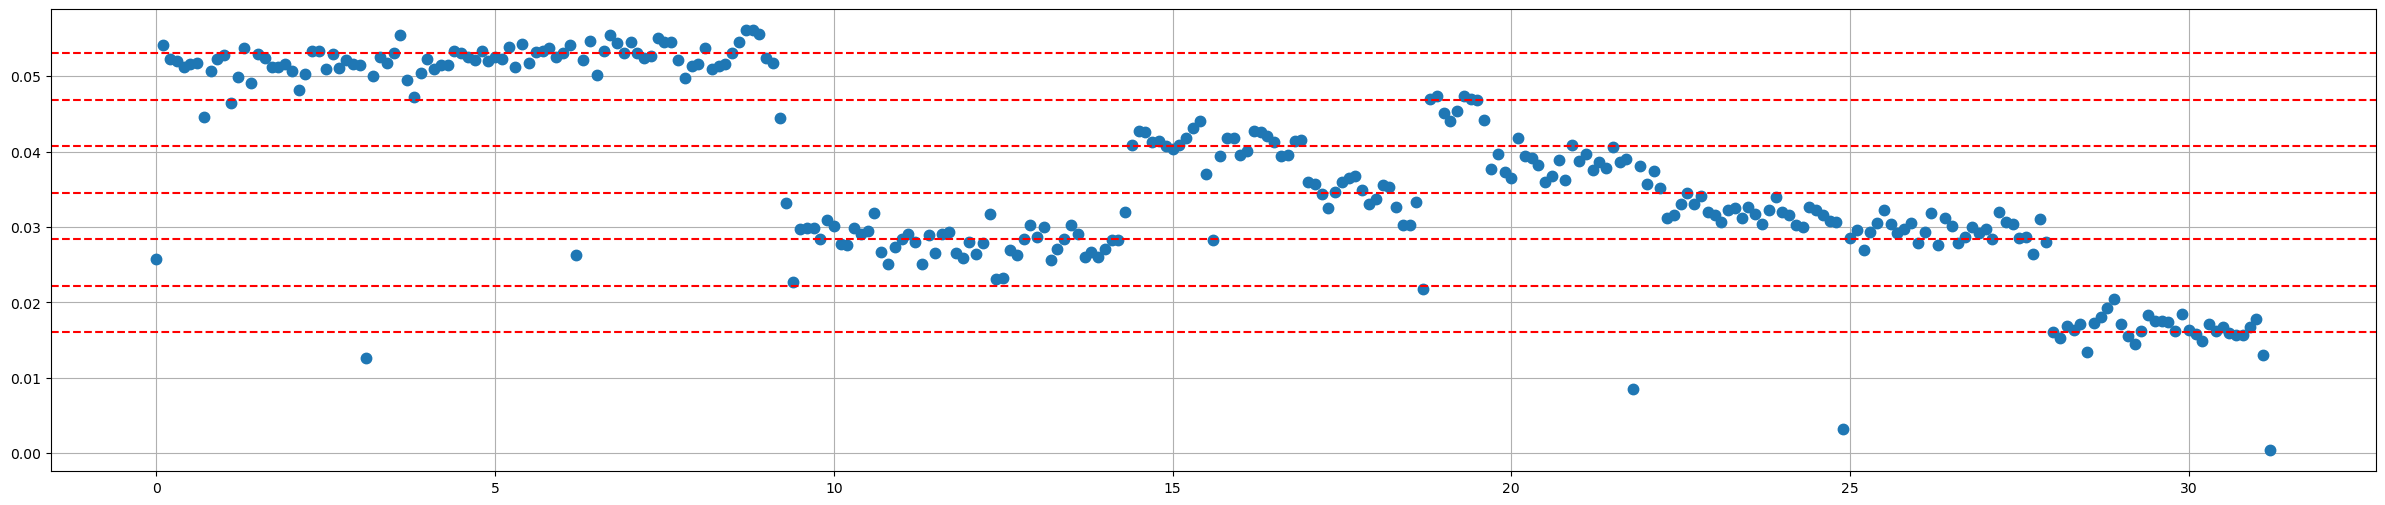

In [130]:
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
nperseg = fs / 5

tt, sig, ff, Zxx = peak_amplitude_stft(data[1], fs, nperseg, drive_freq)

fig, ax = plt.subplots(figsize = (30, 6))
ax.grid()
ax.plot(tt, sig, '.', markersize=15)

for yy in np.linspace(0.016, 0.053, 7):
    ax.axhline(y=yy, color='r', linestyle='--')

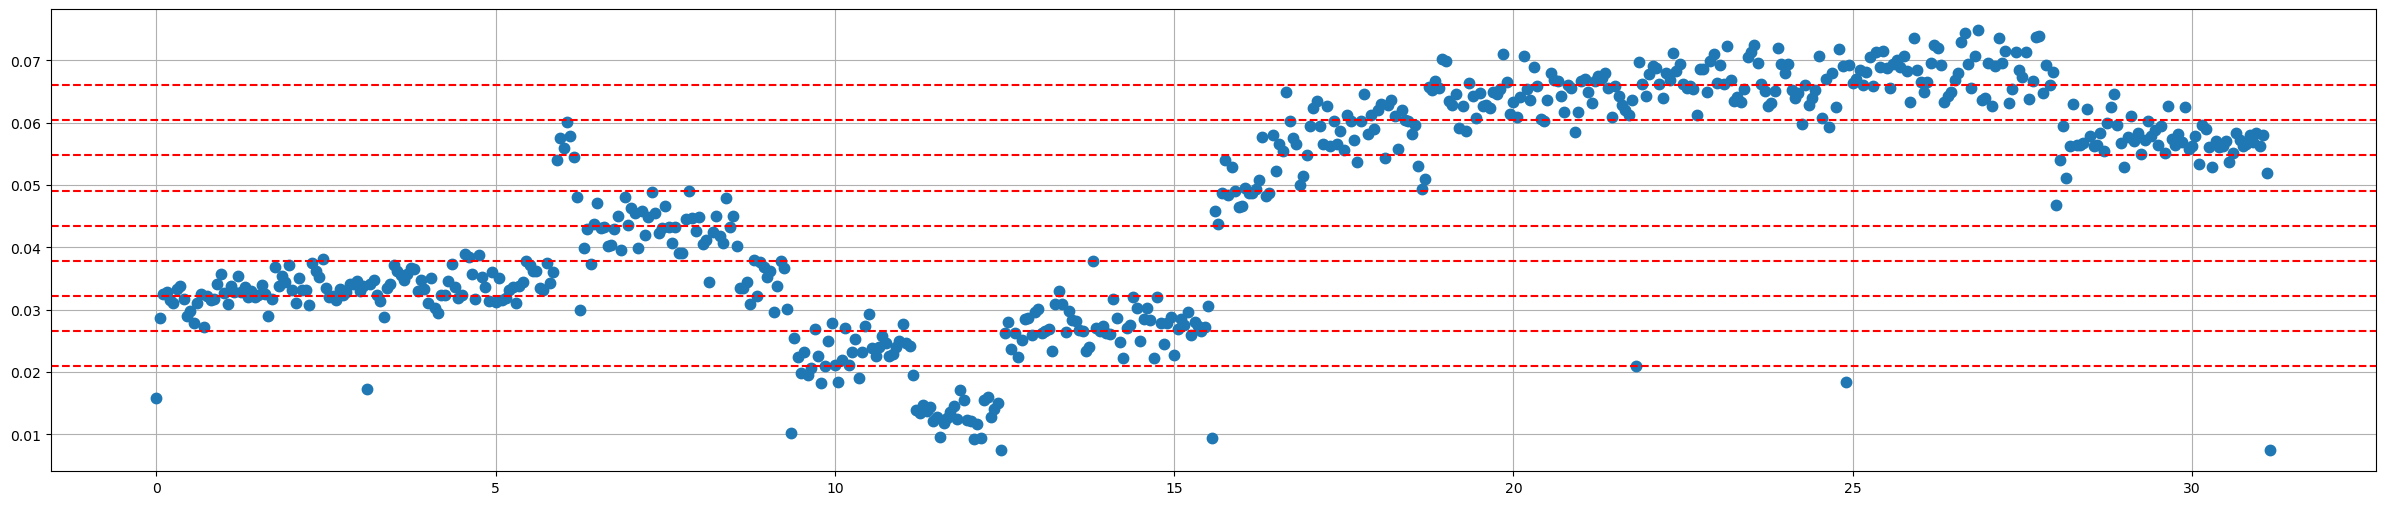

In [136]:
data_file = r"D:\Experiment\Charging\20230717\charging_1_8mbar_800mV_long_sec_2.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
nperseg = fs / 10

tt, sig, ff, Zxx = peak_amplitude_stft(data[1], fs, nperseg, drive_freq)

fig, ax = plt.subplots(figsize = (30, 6))
ax.grid()
ax.plot(tt, sig, '.', markersize=15)

for yy in np.linspace(0.021, 0.066, 9):
    ax.axhline(y=yy, color='r', linestyle='--')

With only 800 mV driving field at 26 kHz, no high voltage. There is slow drift in the amplitude even when there are no charge jumps because the laser power is slowly drifting.

Just by eyeballing each individual charge jump is ~0.005 V in amplitude, so the sphere has approximately 6 charges.

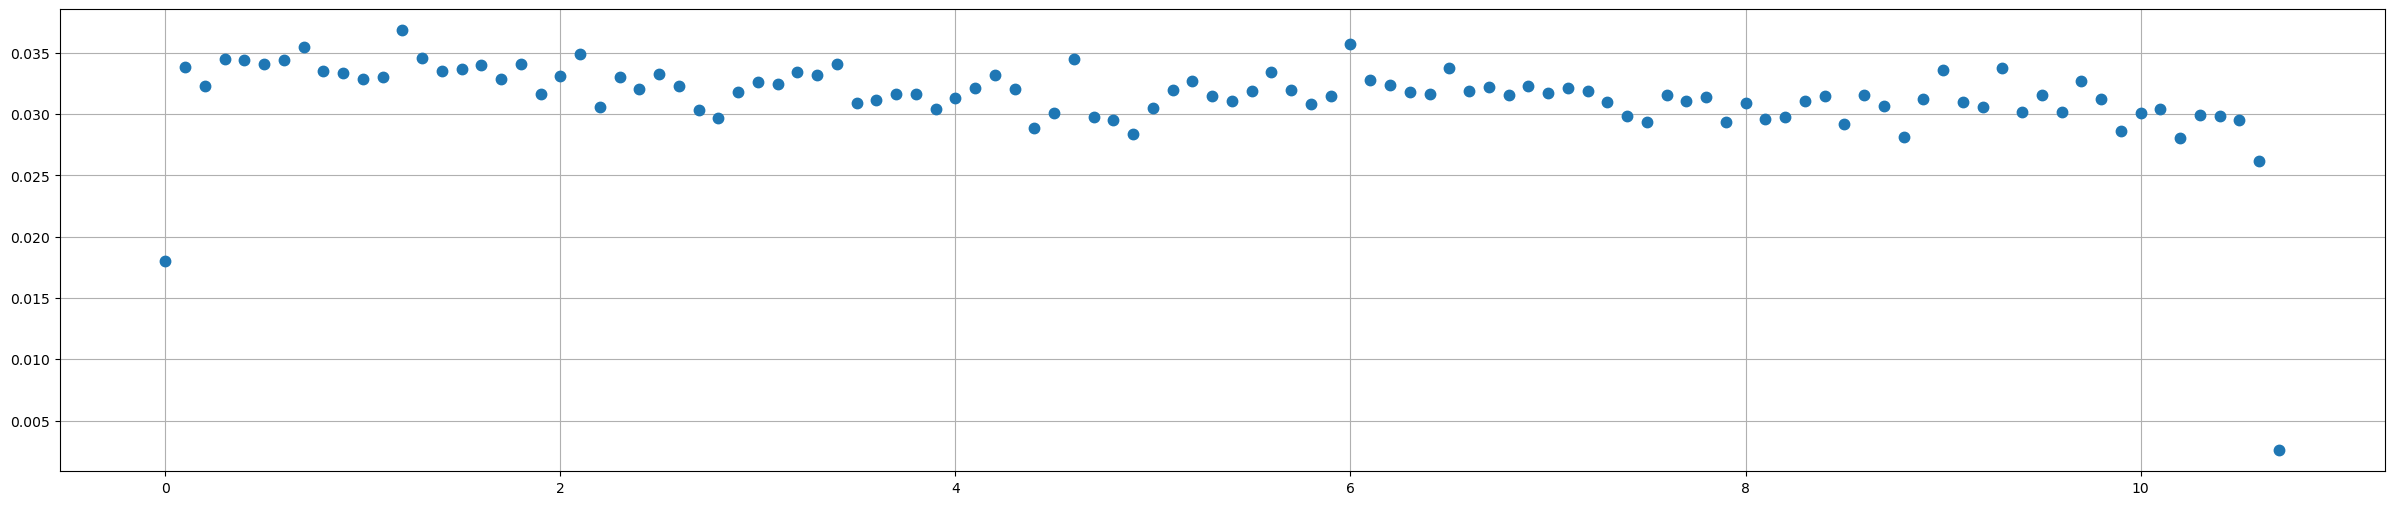

In [135]:
nohv_file = r"D:\Experiment\Charging\20230717\nohv_1_8mbar_800mV\nohv_1_8mbar_800mV_1.csv"
nohv = np.genfromtxt(nohv_file, delimiter=',', skip_header=3).T

fs = int(np.ceil(1 / (nohv[0, 1] - nohv[0, 0])))
nperseg = fs / 5

tt, sig, ff, Zxx = peak_amplitude_stft(nohv[1], fs, nperseg, drive_freq)

fig, ax = plt.subplots(figsize = (30, 6))
ax.grid()
ax.plot(tt, sig, '.', markersize=15)

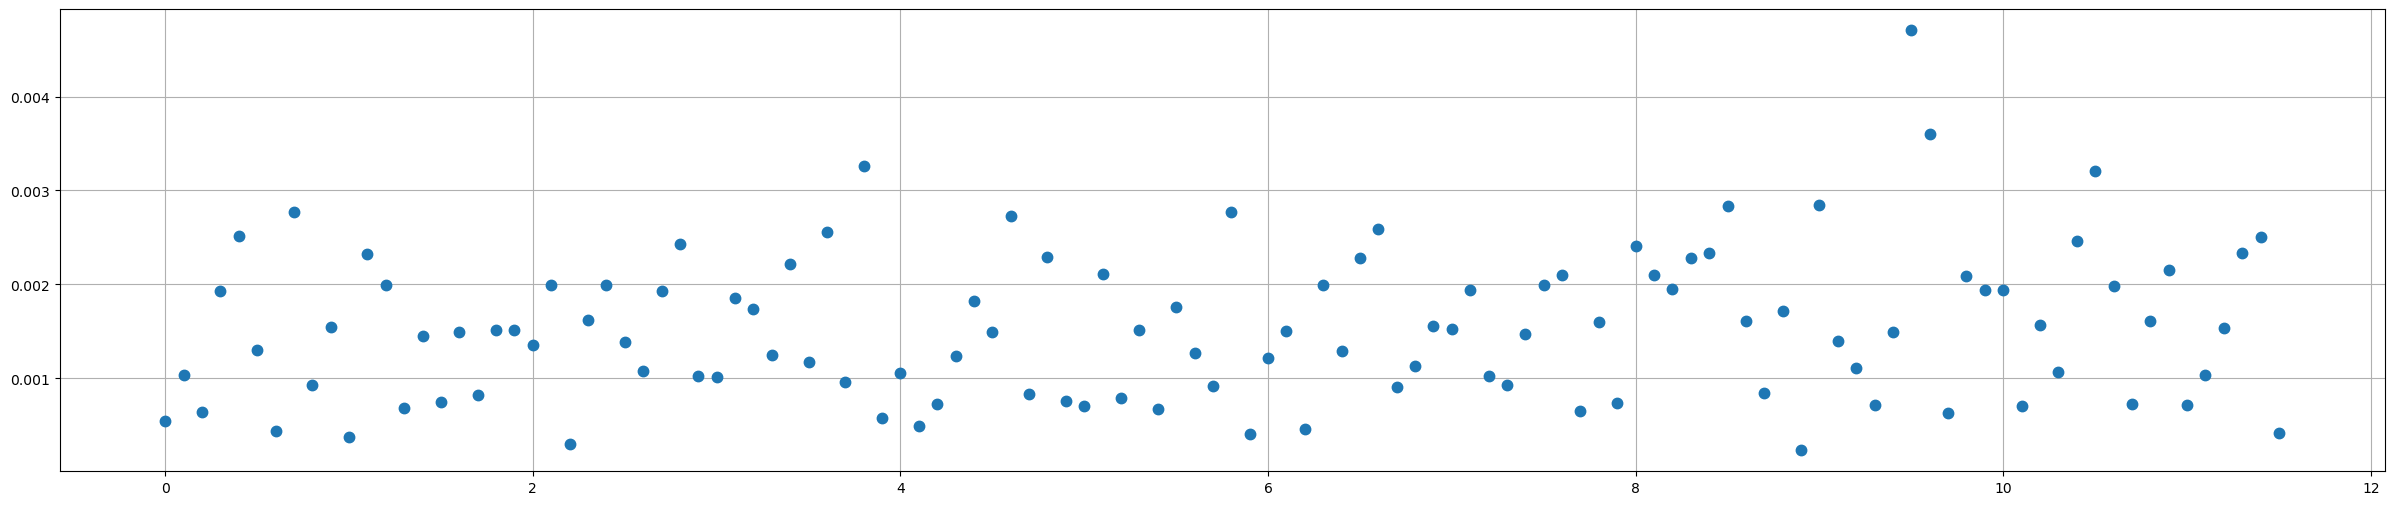

In [153]:
bg_file = r"D:\Experiment\Charging\20230717\bg_1_9mbar\bg_1_9mbar_3.csv"
bg = np.genfromtxt(bg_file, delimiter=',', skip_header=3).T

fs = int(np.ceil(1 / (bg[0, 1] - nohv[0, 0])))
nperseg = fs / 5

tt, sig, ff, Zxx = peak_amplitude_stft(bg[1], fs, nperseg, drive_freq)

fig, ax = plt.subplots(figsize = (30, 6))
ax.grid()
ax.plot(tt, sig, '.', markersize=15)

Fit the z peak to get the center frequency and damping

In [202]:
from scipy.optimize import curve_fit

def peak_func(x, amp, omega_0, gamma):
    return amp * gamma / ( ( omega_0**2 - x**2)**2 + gamma**2 * x**2 )

def fit_peak(x, y, peak_func, p0=None):
    popt, pcov = curve_fit(peak_func, x, y, p0=p0)
    
    # Return central frequency and gamma
    return popt, x, peak_func(x, *popt)

In [ ]:
# We have 100s of data, take only 20s
freq, psd = get_psd(bg[1], fs, 5, fs/10)

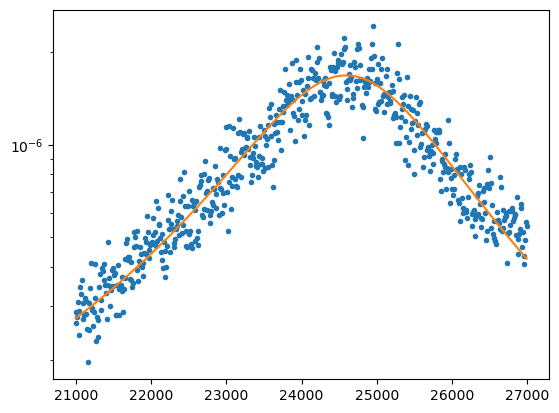

In [208]:
# Take only one of the specturm for analysis
lb, ub = 2100, 2700
plot_idx = 2
plt.plot(freq[plot_idx][lb:ub], psd[plot_idx][lb:ub], '.')

popt, xx, yy = fit_peak(freq[plot_idx][lb:ub], psd[plot_idx][lb:ub], peak_func, p0=[1e6, 24000, 1000])
plt.plot(xx, yy)

plt.yscale('log')

In [206]:
# Amplitude, central frequency, damping
print(popt)

[2.98206330e+06 2.46791135e+04 2.93086999e+03]


Integrate over the z peak

In [210]:
np.trapz(psd[plot_idx][lb:ub], freq[plot_idx][lb:ub])

0.005490112061938089

Now need to integrate over the driving peak

In [212]:
# Again take 20s of nohv data
freq_nohv, psd_nohv = get_psd(nohv[1], fs, 5, fs/10)

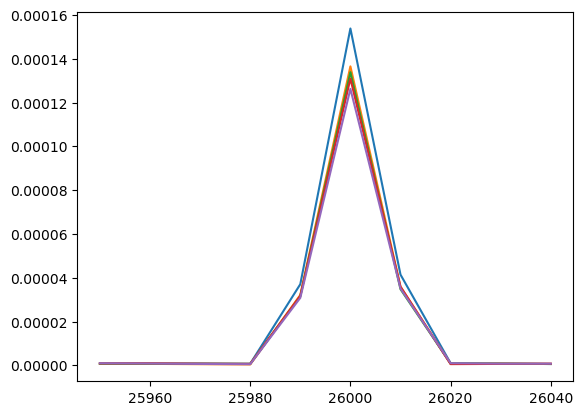

In [219]:
lb, ub = 2595, 2605
for i in range(5):
    plt.plot(freq_nohv[i][lb:ub], psd_nohv[i][lb:ub])

Just pick one and integrate over...

In [220]:
np.trapz(psd_nohv[3][lb:ub], freq_nohv[3][lb:ub])

0.002032630999814068

SyntaxError: can't use starred expression here (184306875.py, line 1)

Integrate over both the z peak and the driving peak in the spectrum 

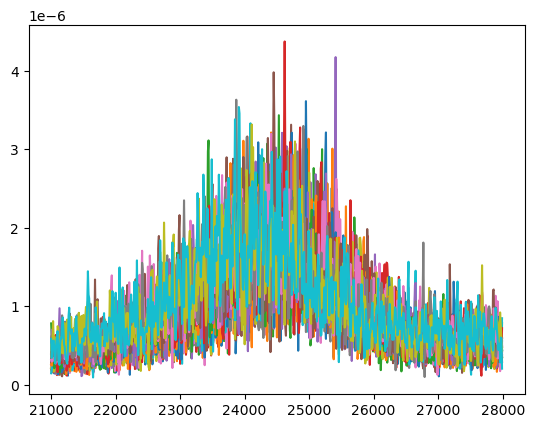

In [163]:


# area = []
for i, pp in enumerate(psd):
    plt.plot(freq[i][lb:ub], pp[lb:ub])
    area.append(np.trapz(pp[lb:ub], freq[i][lb:ub]))

The area under the peak is also drifting -- but let us take it to be 0.005.

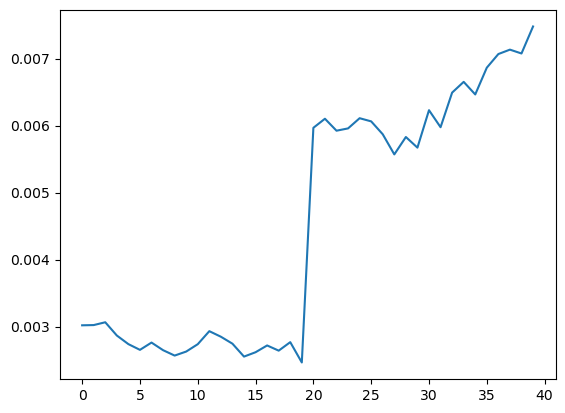

In [164]:
plt.plot(area)

## 2023/05/18

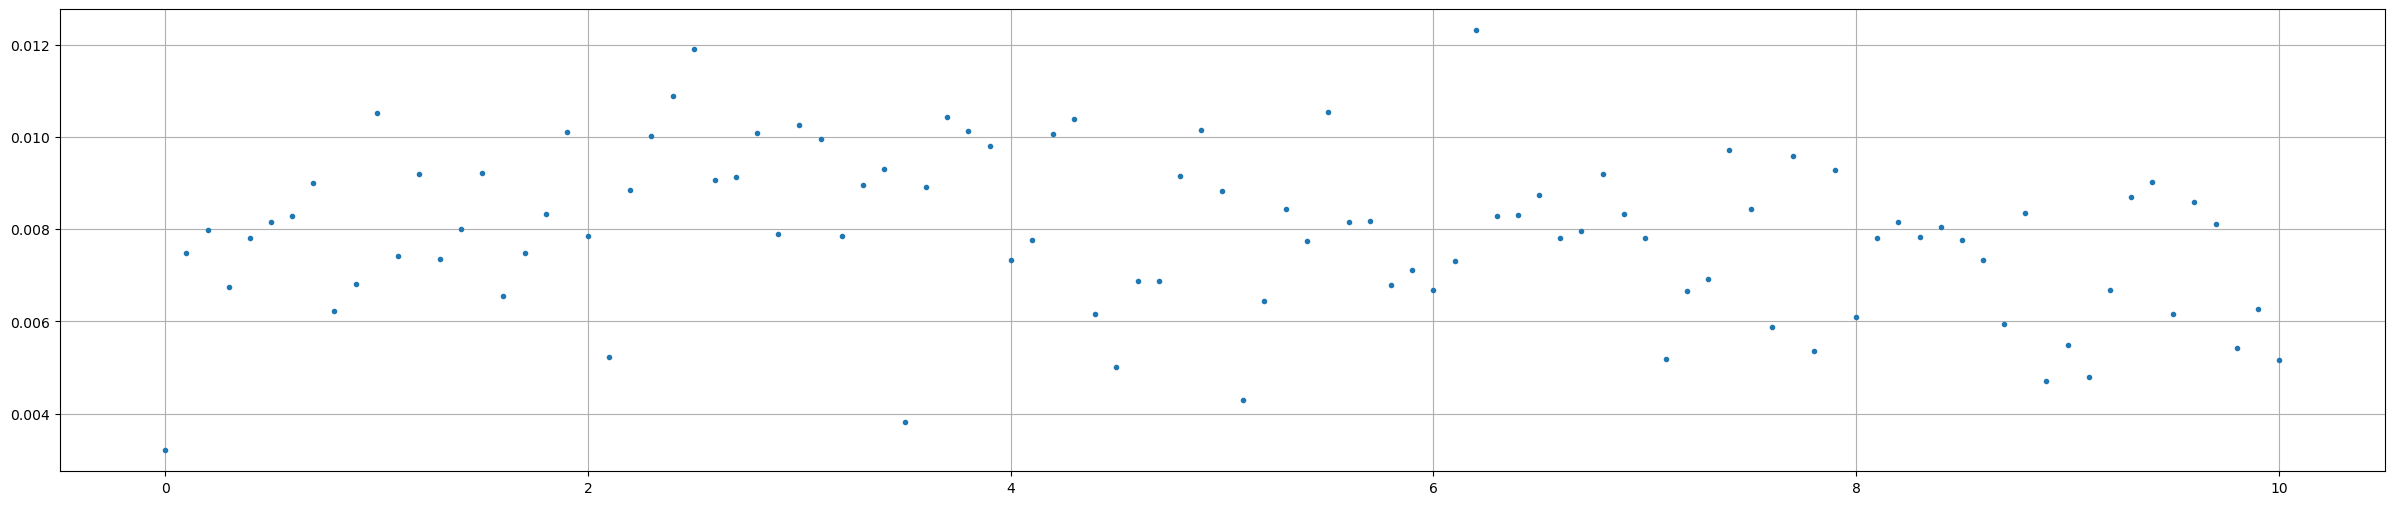

In [36]:
data = sio.loadmat(r'D:\\Experiment\\Charging\\20230518\\charging_10s_2v_24khz.mat')
tod = np.transpose(data['A'])[0]
fs = 1e6 / 10  # Sampling frequency
nperseg = fs / 5

tt, sig, ff, Zxx = peak_amplitude_stft(tod, fs, nperseg, 24000)

plt.figure(figsize = (30, 6))
plt.grid()
plt.plot(tt, sig, '.')

In [51]:
nperseg

20000.0

In [56]:
fff, ppp = get_psd(tod, 100, fs, nperseg)

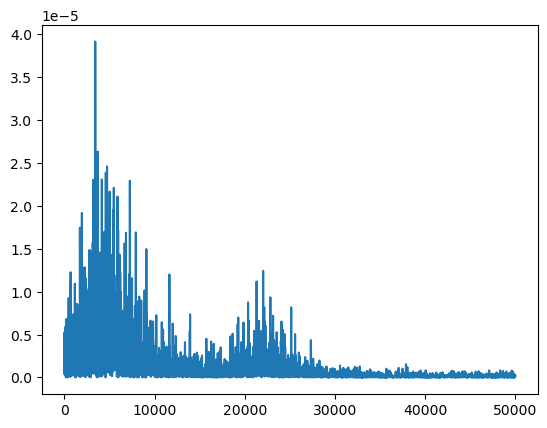

In [58]:
plt.plot(fff[0], ppp[0])

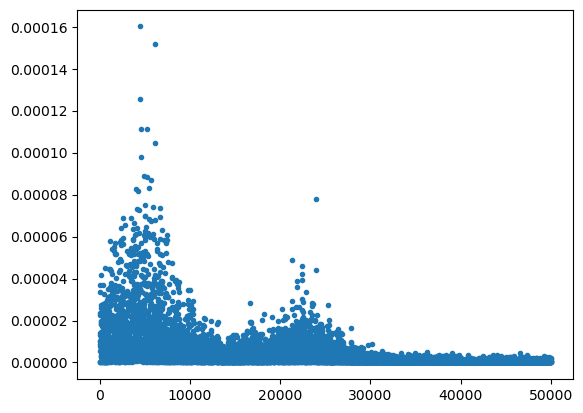

In [47]:
plt.plot( ff, np.abs(Zxx.T[50])**2 , '.')

In [44]:
Zxx.T[10]

array([ 6.1785872e-03+0.j        , -3.6970850e-03-0.00237437j,
        2.3520428e-04+0.00344775j, ...,  5.2513281e-04-0.00015143j,
       -1.9988642e-04+0.0002675j , -8.6502128e-05+0.j        ],
      dtype=complex64)

## Loading data

In [93]:
# data0 = sio.loadmat('D:\\Nanospheres\\Charging\\230413\\charging1.mat')
# data_bg = sio.loadmat('D:\\Nanospheres\\Charging\\230412\\No HV4.mat')
data0 = sio.loadmat('D:\\Nanospheres\\Charging\\230414\\Longer_timetrace\\2V_2.5s.mat')
data_bg = sio.loadmat('D:\\Nanospheres\\Charging\\230414\\charging_3v_10s_nohv_0.mat')

signal0 = np.transpose(data0['A'])[0]
signal1 = np.transpose(data0['B'])[0]
signal_bg = np.transpose(data_bg['A'])[0]
signal_bg_volt = np.transpose(data_bg['B'])[0]

fs = 1e6  # Sampling frequency
# fs = int(50e6 / 200)
nperseg = fs / 1e3 # Number of points for psd calculation

## Quick Estimation

In [81]:
npt = signal0.size
nspectra = 10
nsample = int(npt / nspectra)

tod0 = np.reshape(signal0, (nspectra, nsample))
tod_bg = np.reshape(signal_bg, (nspectra, nsample))

f0, psd0 = get_psd(tod0, fs, nperseg)
f_bg, psd_bg = get_psd(tod_bg, fs, nperseg)

ValueError: cannot reshape array of size 10000000 into shape (10,5000000)

In [21]:
tod.shape

(1000000,)

In [49]:
# This is just a quick and dirty way to get the 32 kHz signal in the spectra
f_sig = np.where(f0[0]==32000)[0][0]
sig0 = psd0.T[f_sig]
sig_bg = psd_bg.T[f_sig]

In [17]:
fs

100000.0

In [13]:
sig.shape

(1000000,)

### Plotting

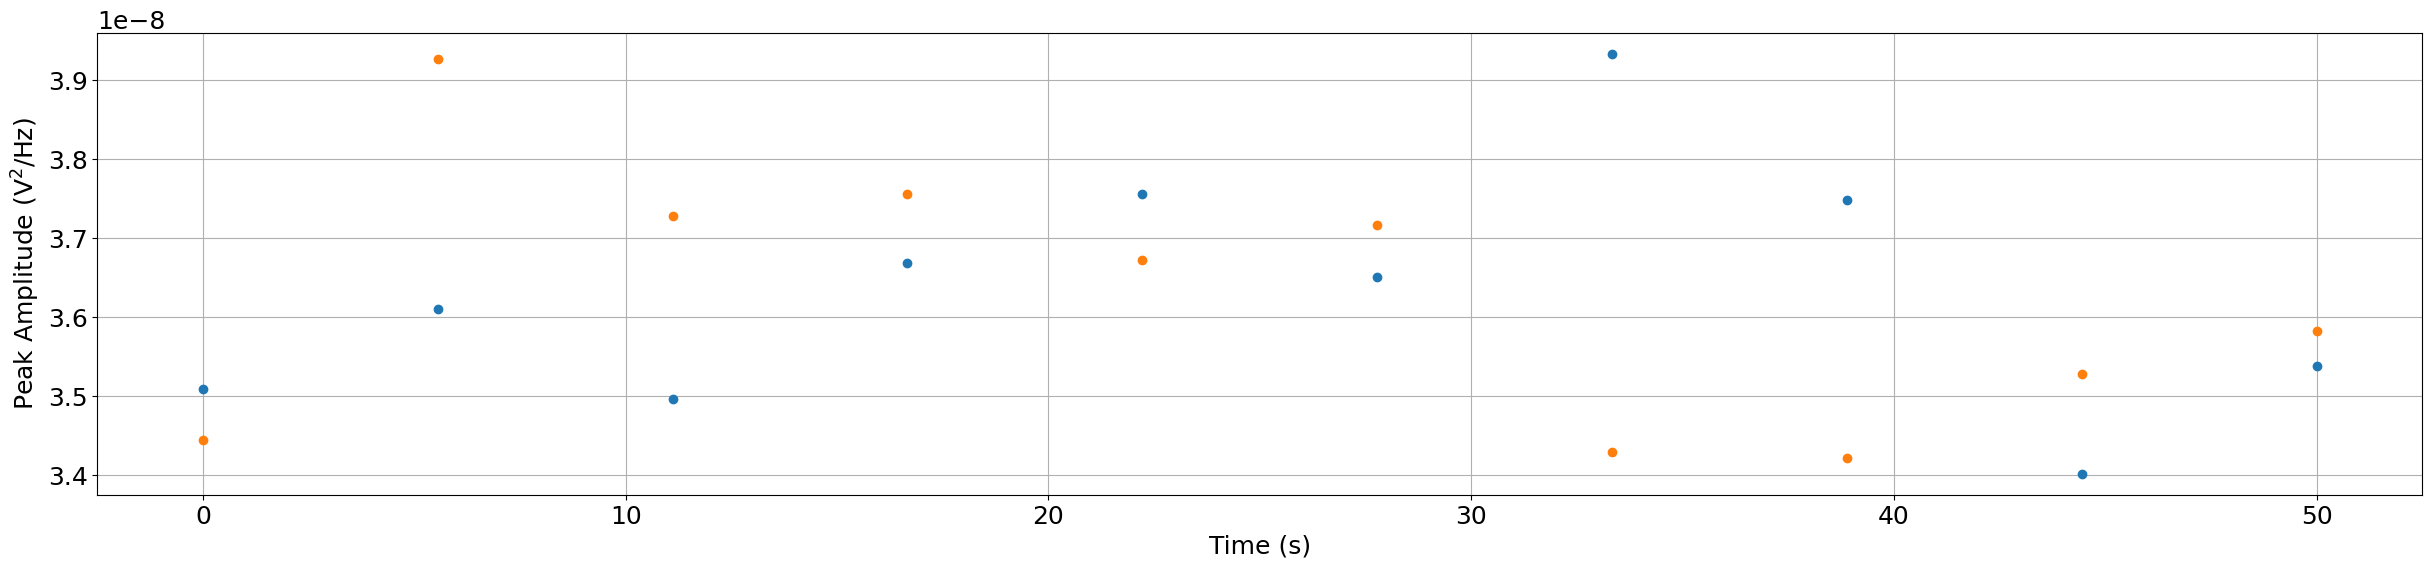

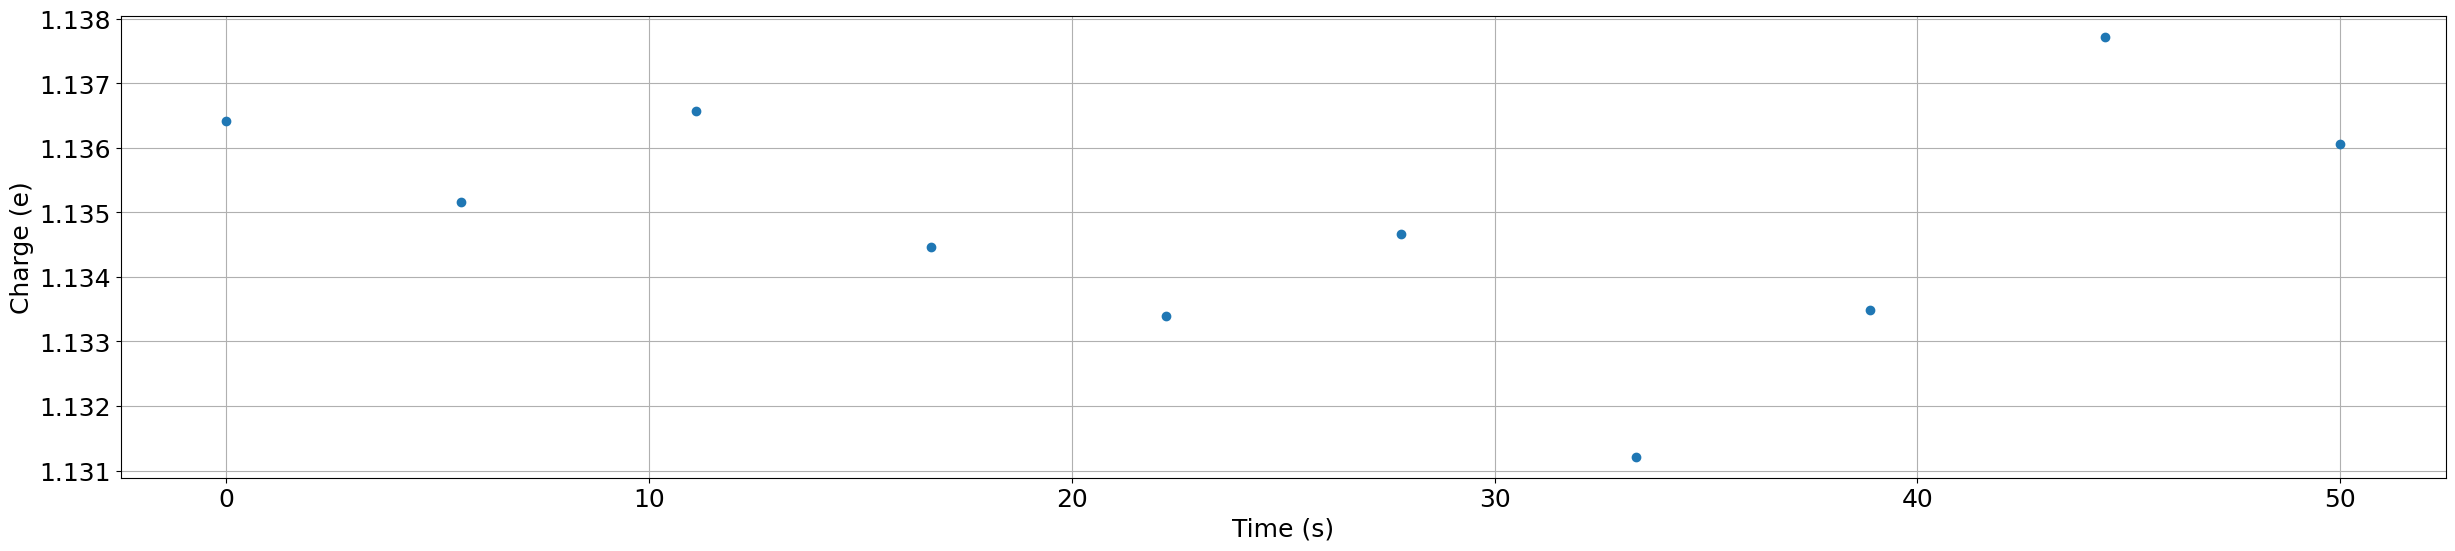

In [25]:
sec = npt / fs
time = np.linspace(0, sec, nspectra)

plt.rc('font', size = 18)
plt.figure(figsize = (30, 6))
plt.grid()
plt.plot(time, np.array(sig0), 'o')
plt.plot(time, np.array(sig_bg), 'o')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
plt.show()

plt.rc('font', size = 18)
plt.figure(figsize = (30, 6))
plt.grid()
plt.plot(time, (np.sqrt(abs(np.array(sig0)- 50*10**(-8))))/(6*10**(-4)), 'o')
plt.ylabel('Charge (e)')
plt.xlabel('Time (s)')
plt.show()

In [ ]:
ff.shape

## Short-time Fourier transfrom

In [85]:
signal0_volt.shape

(20000000,)

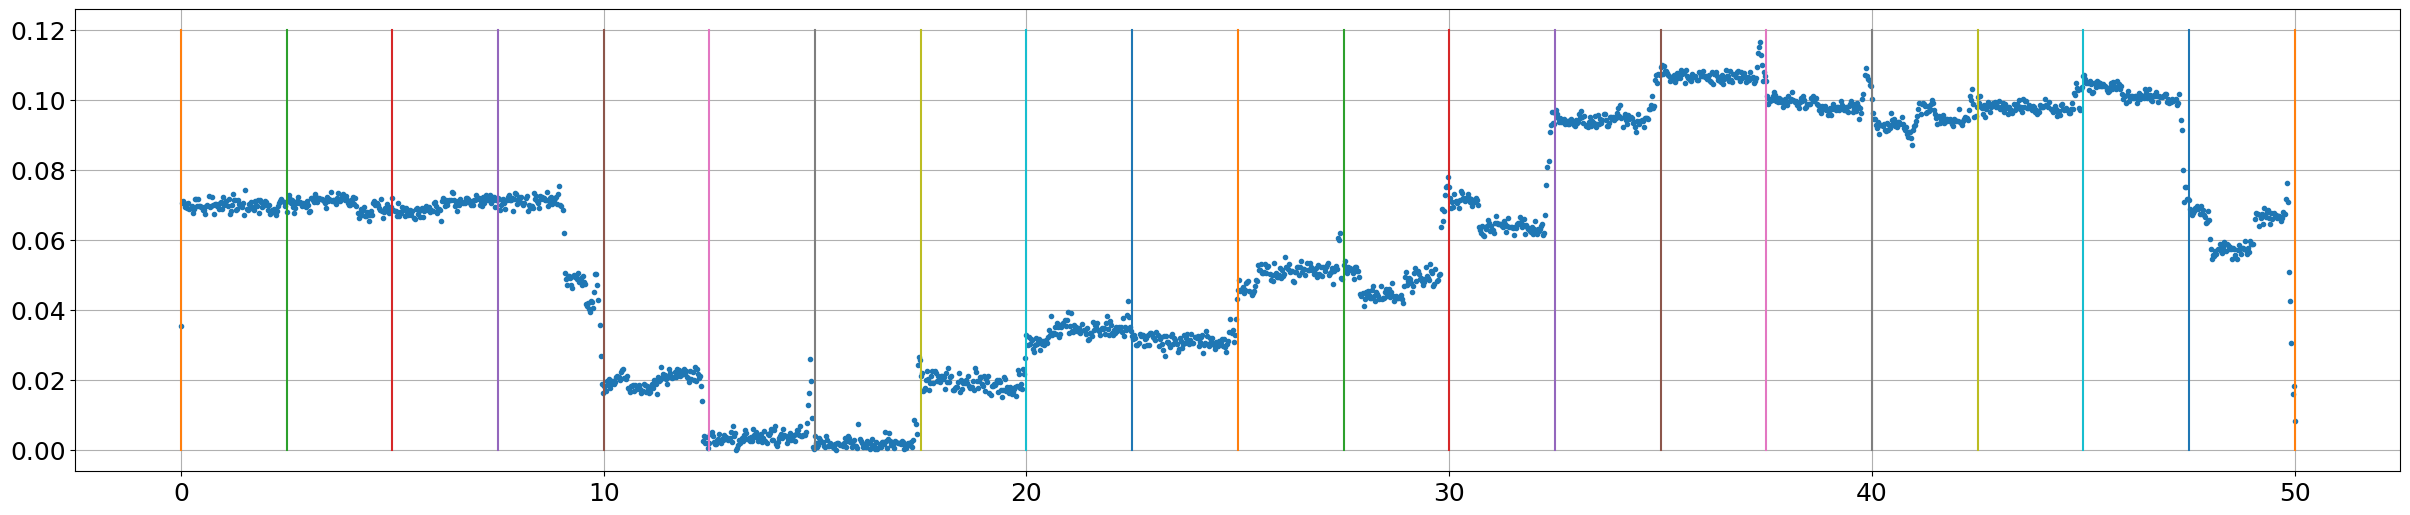

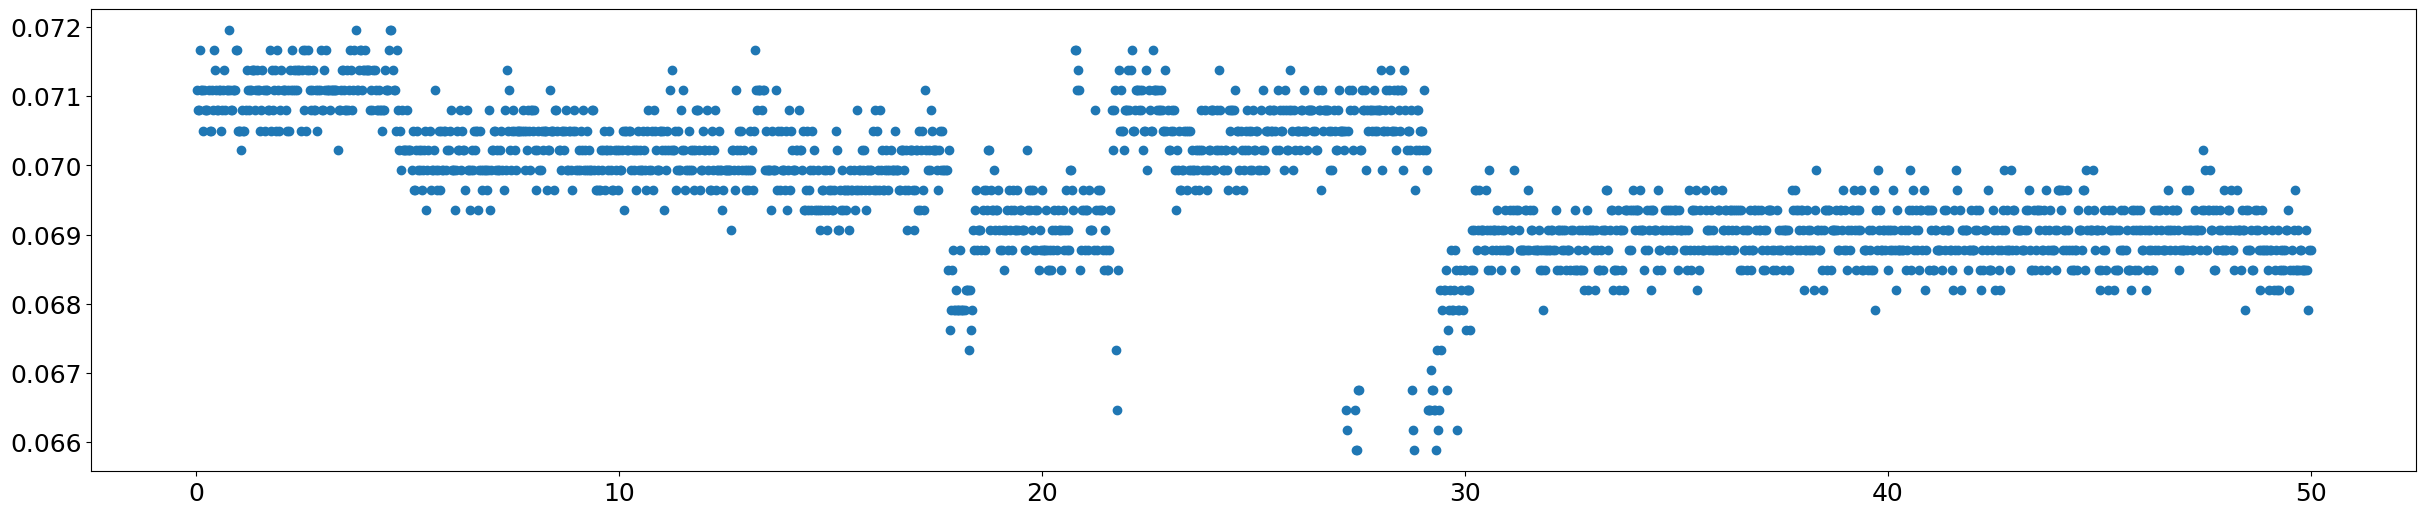

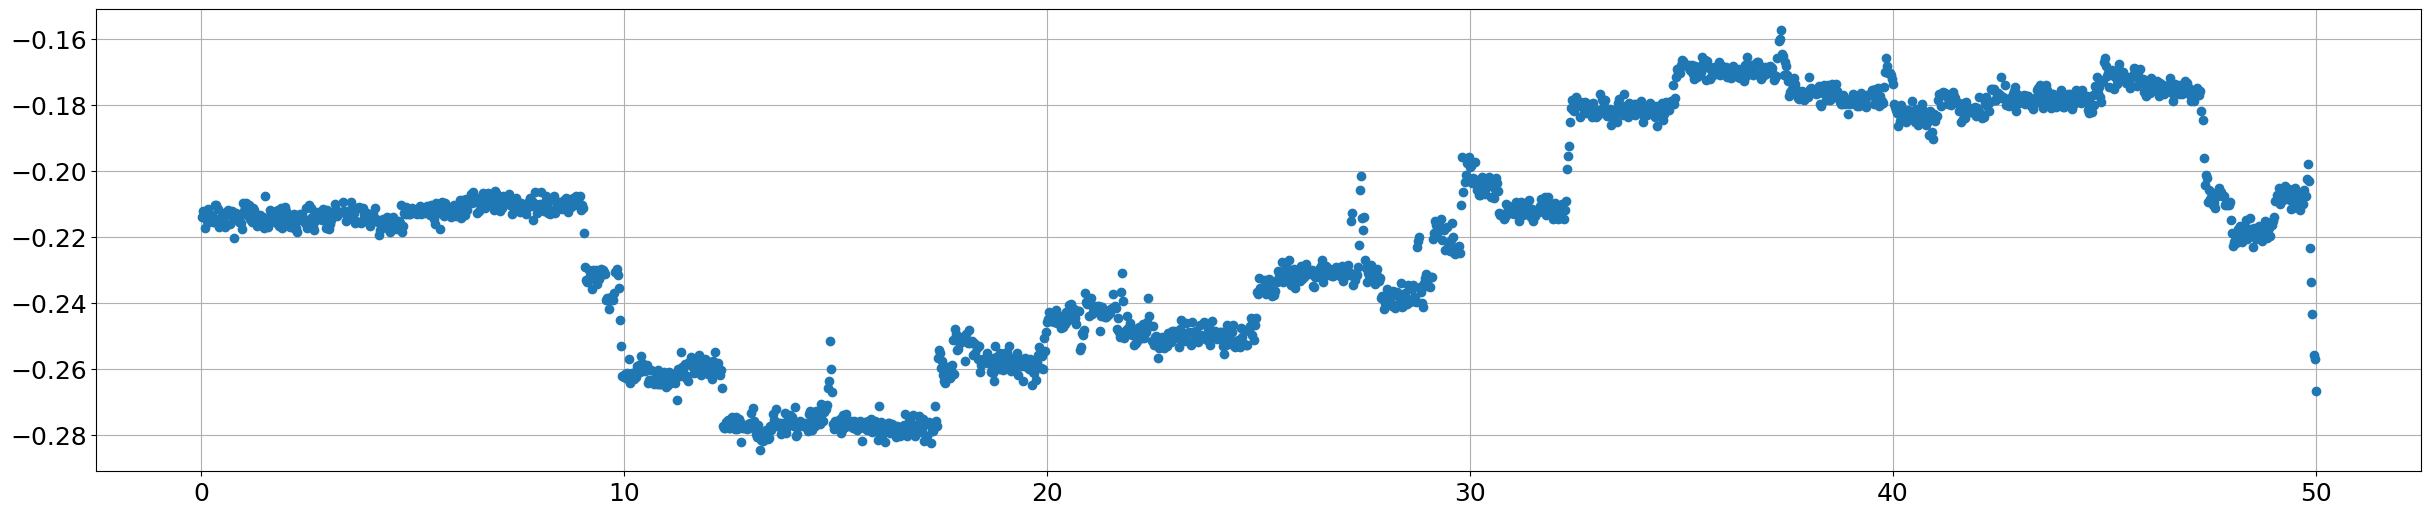

In [92]:
ff, tt, Zxx = stft(signal0, fs=fs, nperseg=nperseg*50)
f = np.where(ff==27000)[0][0]
sig = np.abs(Zxx)

plt.figure(figsize = (30, 6))
plt.grid()
plt.plot(tt, sig[f], '.')
for i in np.arange(0, 51, 2.5):
    plt.plot([i, i],[0.0, 0.12])
    
plt.figure(figsize = (30,6))
plt.plot(tt[1:], signal0_volt[::10000],'o')

plt.figure(figsize = (30, 6))
plt.grid()
plt.plot(tt[1:], sig[f][1:]-4*signal0_volt[::10000], 'o')

[]

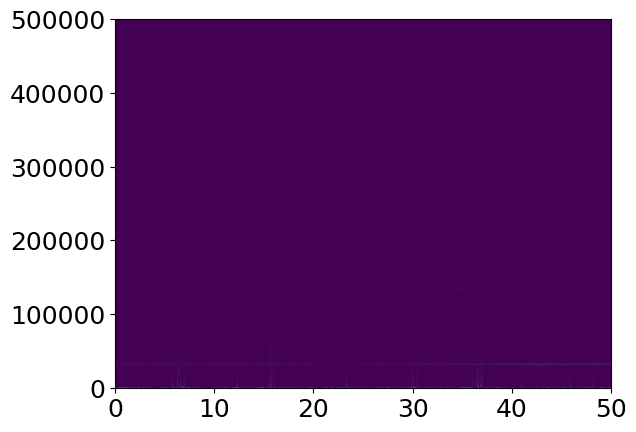

In [117]:
#plt.pcolormesh(tt, ff, sig, shading='nearest')
#plt.plot()

In [80]:
# let's try demod and filter

In [102]:
import scipy 
from scipy.signal import butter, lfilter

def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype='lowpass')
    return b, a


def butter_lowpass_filter(data, highcut, fs, order=5):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def charge_from_tt(signal, drive, centre_freq):
    filt = butter_lowpass_filter(signal, centre_freq+1000, fs = 10**6, order=5)
    filtfilt = butter_highpass_filter(filt, centre_freq-1000, fs = 10**6, order=5)
    mod = filtfilt*drive
    mod_filt = butter_lowpass_filter(mod, 10, fs = 10**6, order=2)
    return mod_filt

def charge_from_tt2(signal, drive, centre_freq):
    filt = butter_lowpass_filter(signal, centre_freq+1000, fs = 10**6, order=5)
    filtfilt = butter_highpass_filter(filt, centre_freq-1000, fs = 10**6, order=5)
    fftsig = scipy.fft.rfft(filtfilt)
    fftdrive = scipy.fft.rfft(drive)
    corr = fftsig*np.conjugate(fftdrive)
    charge = max(corr, key = abs)
    return charge

In [103]:
charge1 = charge_from_tt(signal0, signal1, 27000)

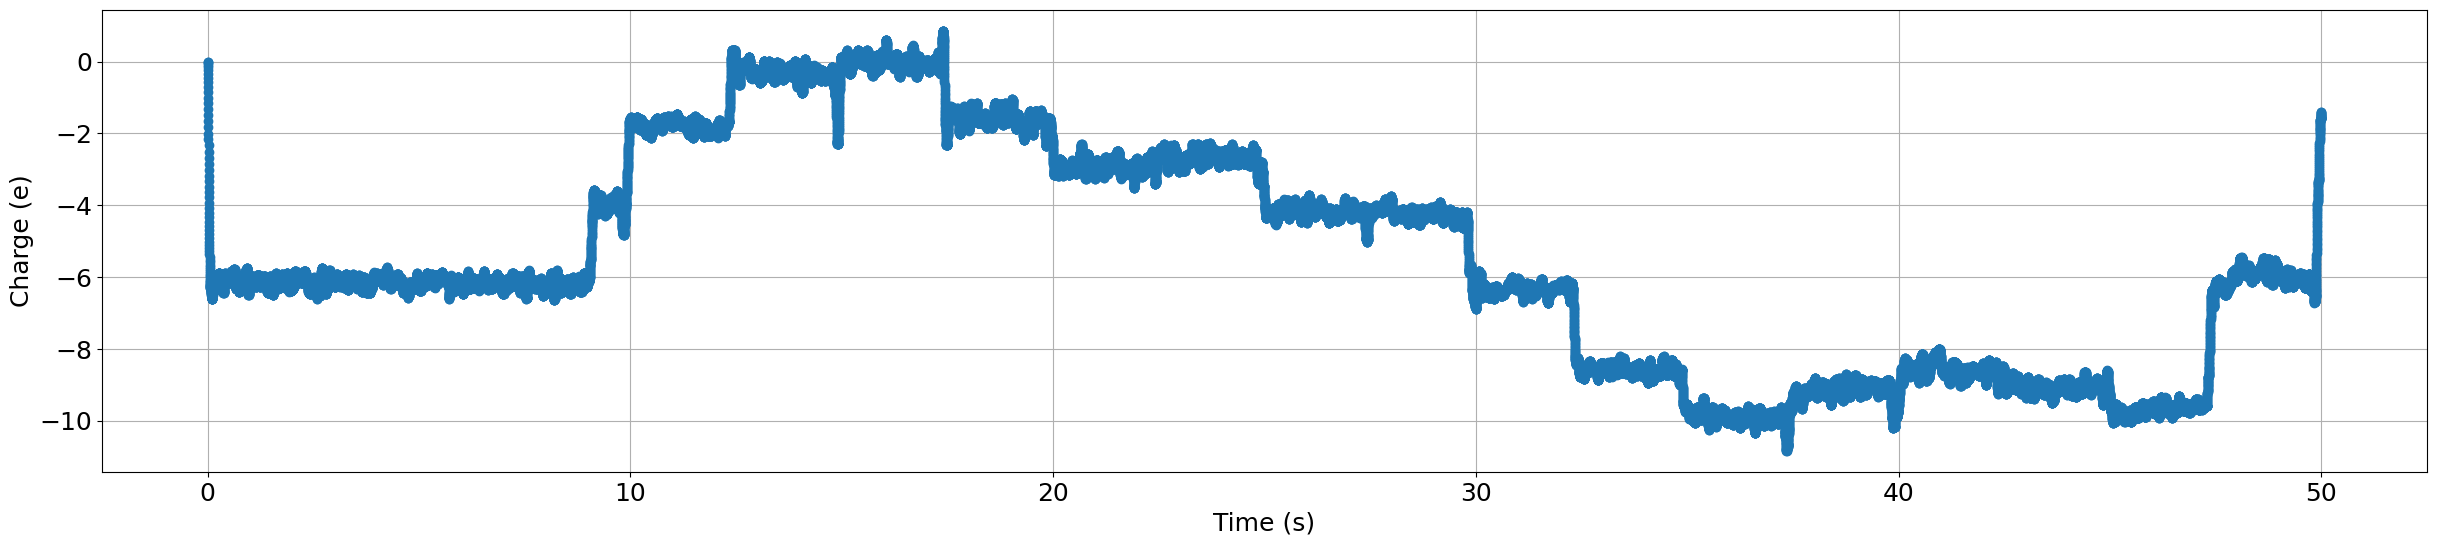

In [109]:
time = np.linspace(0, 50, 50000000)
A = 2.3*10**2

plt.rc('font', size = 18)
plt.figure(figsize = (30, 6))
plt.grid()
plt.plot(time[::1000], A*charge1[::1000], 'o')
#plt.plot([10, 10], [0, 10], '--')
#plt.plot([390, 390], [0, 10], '--')
plt.ylabel('Charge (e)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

In [143]:
events = np.abs(np.diff((np.sqrt(abs(np.array(sig)- 3*10**(-9))))/(7*10**(-5))))

In [232]:
events2 = [0 if i < 0.645 else 1 for i in events]
events3 = [i for i in events if i > 0.645]
print(len(events3))

64


In [248]:
counts = []
tinterval = 5
for i in np.arange(10, 390, tinterval):
    count = events2[i: (i+tinterval)].count(1)
    counts.append(count)

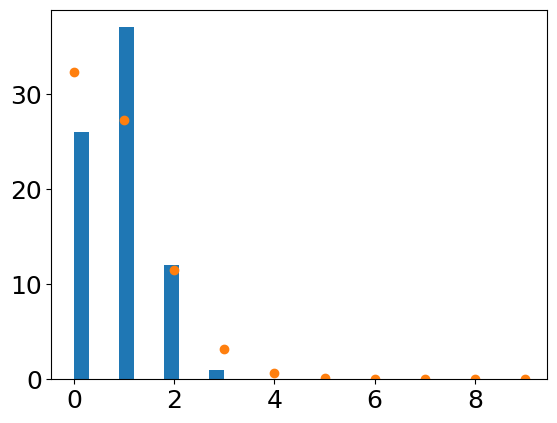

In [255]:
import math

rate = len(events3)/380*tinterval # This is per second. Has to be rate per time interval
k = np.arange(10)
P = rate**k*np.exp(rate)/np.array([math.factorial(j) for j in k])
P = P/sum(P)

plt.hist(counts)
plt.plot(k, P*75, 'o')

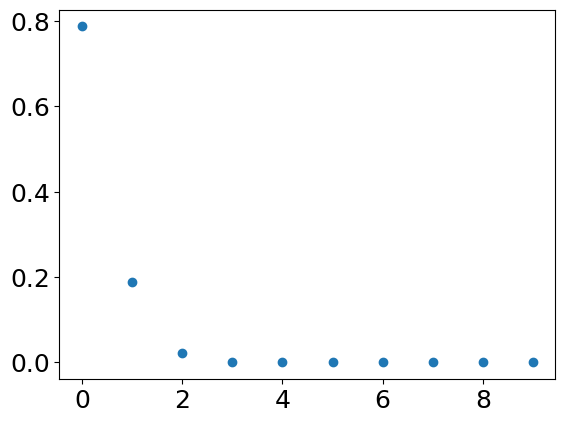

In [79]:
import math

rate = 91/380 # This is per second. Has to be rate per time interval
k = np.arange(10)
P = rate**k*np.exp(rate)/np.array([math.factorial(j) for j in k])
P = P/sum(P)
plt.plot(k, P, 'o')

Text(0.5, 0, 'Frequency (kHz)')

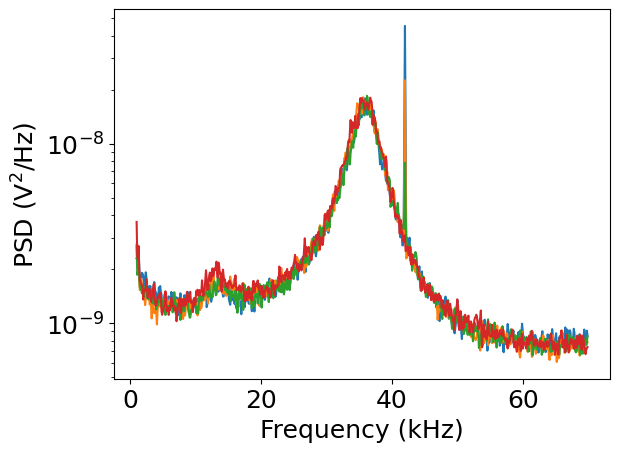

In [33]:
lb = 10
ub = 700
plt.plot(PSDtmp[0][lb:ub]/1000, PSDlist[395][lb:ub])
plt.plot(PSDtmp[0][lb:ub]/1000, PSDlist[278][lb:ub])
plt.plot(PSDtmp[0][lb:ub]/1000, PSDlist[297][lb:ub])
plt.plot(PSDtmp[0][lb:ub]/1000, PSDlist[285][lb:ub])
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')

In [ ]:
# So let's fit this data and calibrate by saying it's at 300K then figure out how much a chagre jump would change the height

# Attempt 2

In [16]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 2\\Charging (1).mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 2\\Charging (2).mat')
signal3 = np.transpose(data['B'])[0]
signal4 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 2\\Charging (3).mat')
signal5 = np.transpose(data['B'])[0]
signal6 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 2\\Charging (4).mat')
signal7 = np.transpose(data['B'])[0]
signal8 = np.transpose(data['D'])[0]

In [17]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal3[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal5[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal7[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

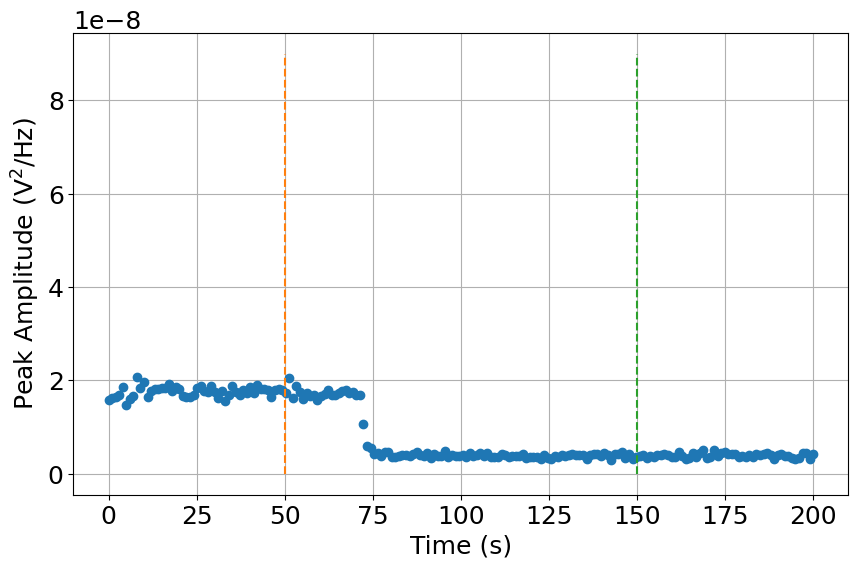

In [18]:
time = np.linspace(0, 200, 200)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
plt.plot([50, 50], [0, 9*10**(-8)], '--')
plt.plot([150, 150], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 3

In [61]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 3\\Charging (1).mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 3\\Charging (2).mat')
signal3 = np.transpose(data['B'])[0]
signal4 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 3\\Charging (3).mat')
signal5 = np.transpose(data['B'])[0]
signal6 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 3\\Charging (4).mat')
signal7 = np.transpose(data['B'])[0]
signal8 = np.transpose(data['D'])[0]

In [62]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal3[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal5[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal7[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

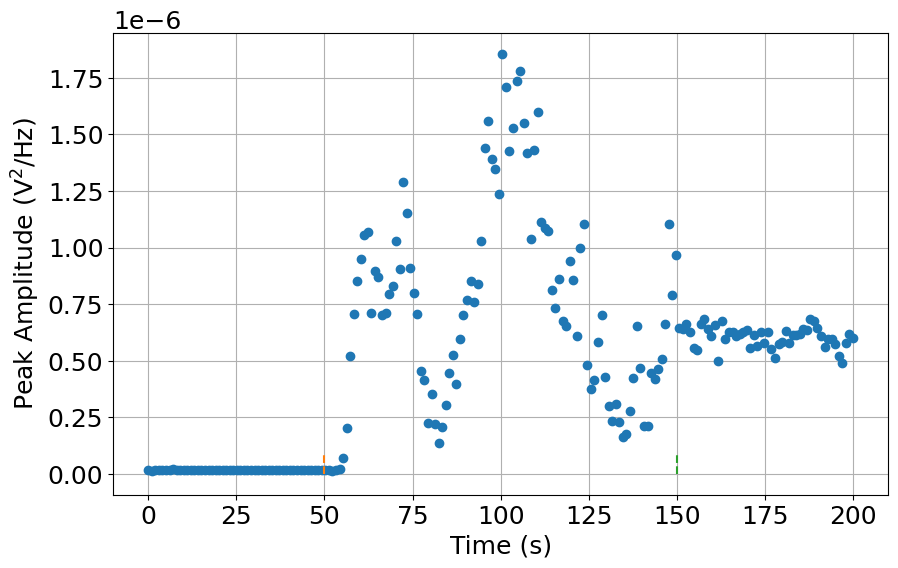

In [65]:
time = np.linspace(0, 200, 200)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
plt.plot([50, 50], [0, 9*10**(-8)], '--')
plt.plot([150, 150], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 5*10**(-8))
plt.show()

# Attempt 4

In [37]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 4\\Charging (1).mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 4\\Charging (2).mat')
signal3 = np.transpose(data['B'])[0]
signal4 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 4\\Charging (3).mat')
signal5 = np.transpose(data['B'])[0]
signal6 = np.transpose(data['D'])[0]

In [38]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal3[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal5[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

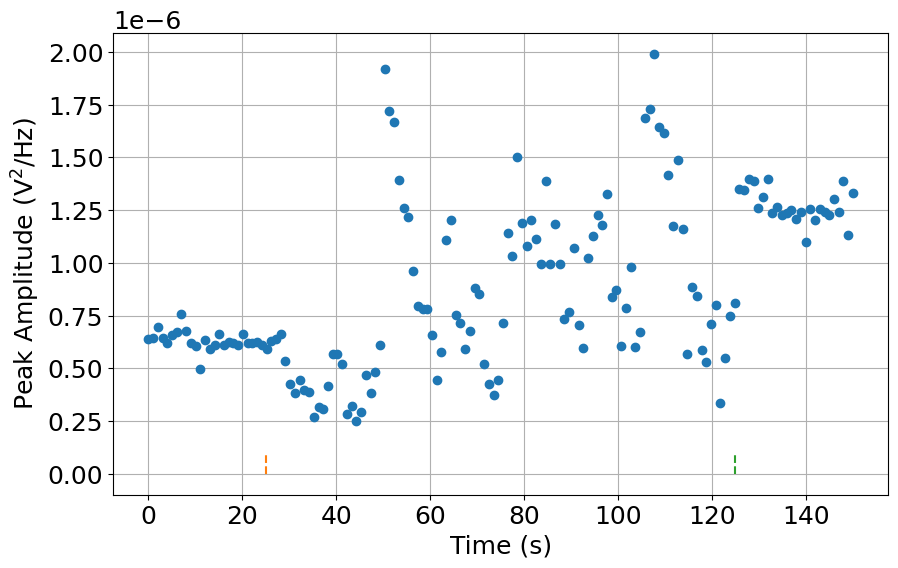

In [39]:
time = np.linspace(0, 150, 150)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
plt.plot([25, 25], [0, 9*10**(-8)], '--')
plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 5

In [34]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 5\\Charging (1).mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 5\\Charging (2).mat')
signal3 = np.transpose(data['B'])[0]
signal4 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 5\\Charging (3).mat')
signal5 = np.transpose(data['B'])[0]
signal6 = np.transpose(data['D'])[0]

In [35]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal3[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal5[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

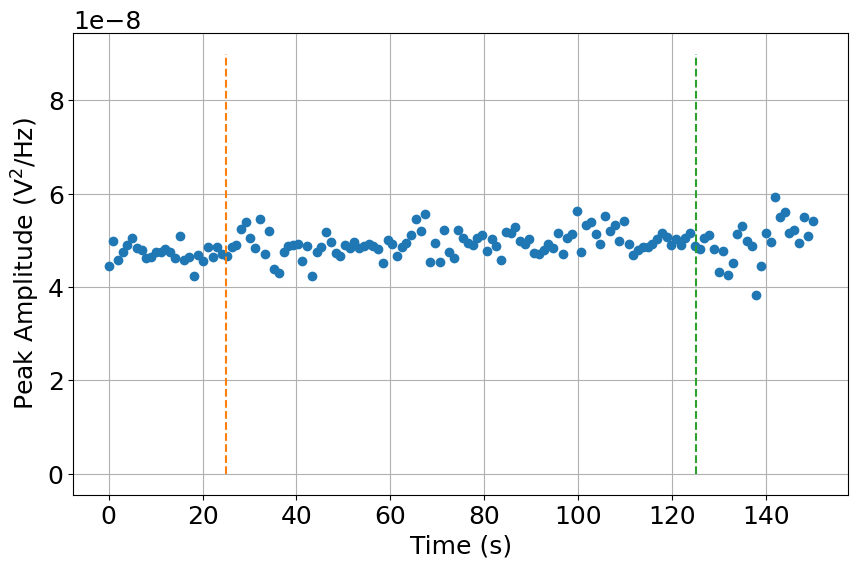

In [36]:
time = np.linspace(0, 150, 150)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
plt.plot([25, 25], [0, 9*10**(-8)], '--')
plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 6

In [40]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 6\\Charging (1).mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 6\\Charging (2).mat')
signal3 = np.transpose(data['B'])[0]
signal4 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 6\\Charging (3).mat')
signal5 = np.transpose(data['B'])[0]
signal6 = np.transpose(data['D'])[0]

In [41]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal3[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal5[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

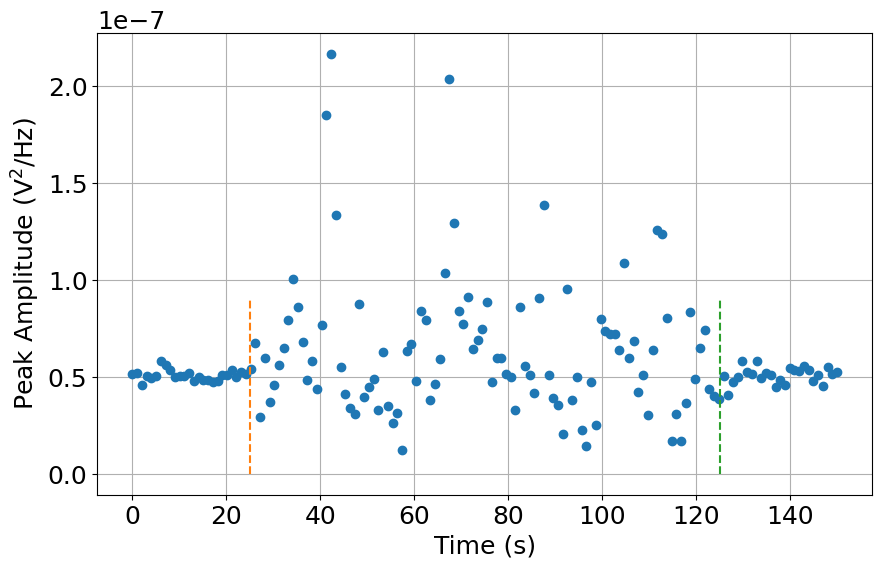

In [42]:
time = np.linspace(0, 150, 150)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
plt.plot([25, 25], [0, 9*10**(-8)], '--')
plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 7

In [43]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 7\\Charging (1).mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 7\\Charging (2).mat')
signal3 = np.transpose(data['B'])[0]
signal4 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 7\\Charging (3).mat')
signal5 = np.transpose(data['B'])[0]
signal6 = np.transpose(data['D'])[0]

In [44]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal3[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal5[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

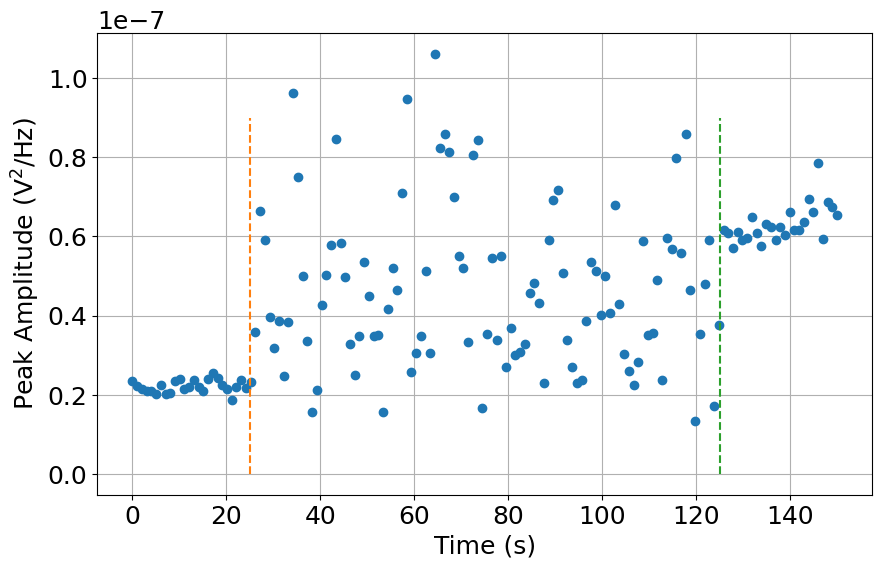

In [45]:
time = np.linspace(0, 150, 150)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
plt.plot([25, 25], [0, 9*10**(-8)], '--')
plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 8

In [47]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 8\\Charging (1).mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 8\\Charging (2).mat')
signal3 = np.transpose(data['B'])[0]
signal4 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 8\\Charging (3).mat')
signal5 = np.transpose(data['B'])[0]
signal6 = np.transpose(data['D'])[0]

In [48]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal3[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal5[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

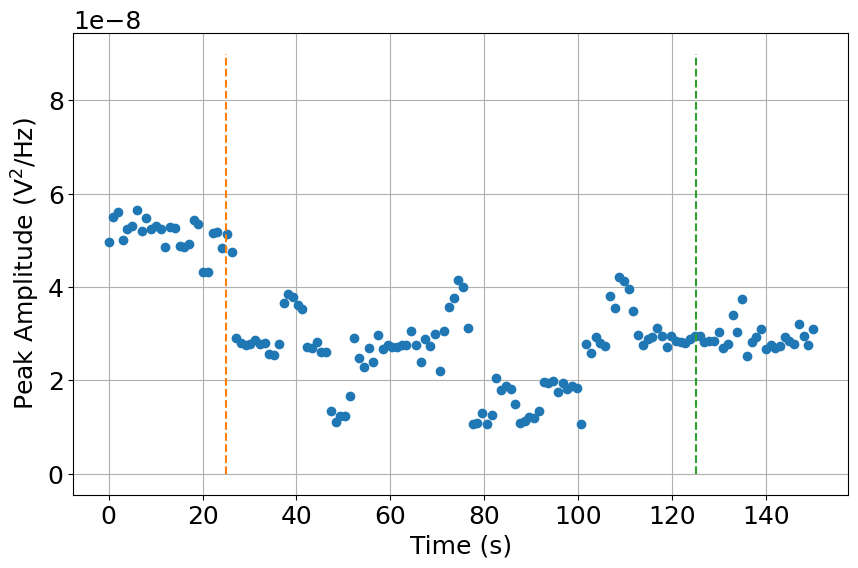

In [49]:
time = np.linspace(0, 150, 150)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
plt.plot([25, 25], [0, 9*10**(-8)], '--')
plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 9

In [51]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 9\\Charging (1).mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 9\\Charging (2).mat')
signal3 = np.transpose(data['B'])[0]
signal4 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 9\\Charging (3).mat')
signal5 = np.transpose(data['B'])[0]
signal6 = np.transpose(data['D'])[0]

In [52]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal3[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal5[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

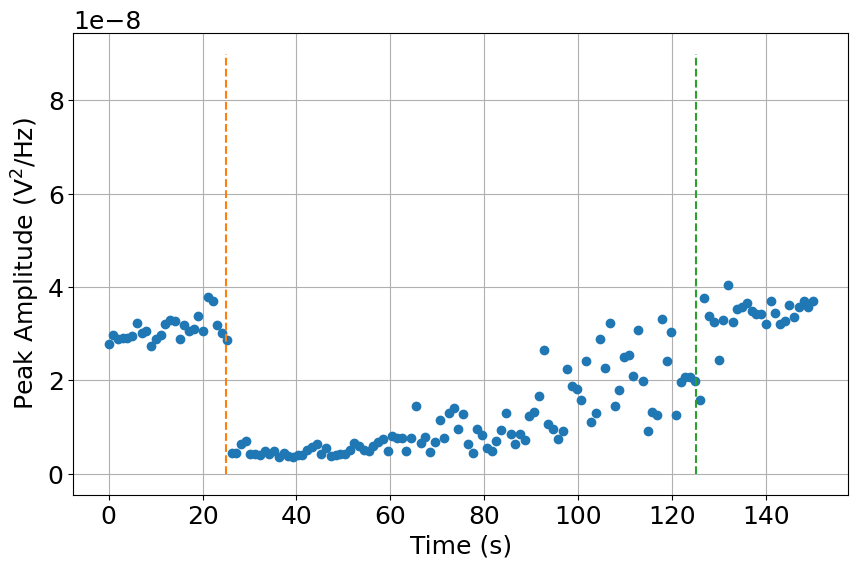

In [53]:
time = np.linspace(0, 150, 150)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
plt.plot([25, 25], [0, 9*10**(-8)], '--')
plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 10

In [54]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 10\\Charging.mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

In [55]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

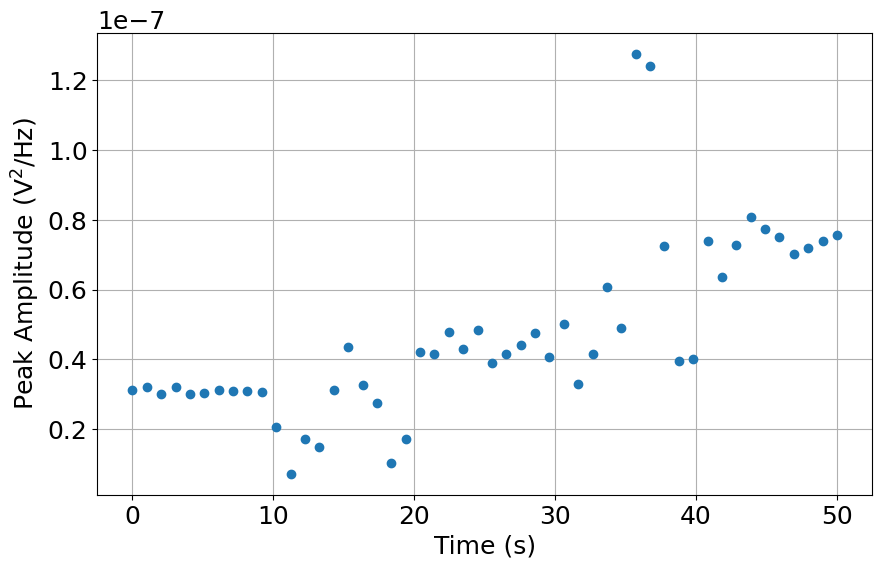

In [56]:
time = np.linspace(0, 50, 50)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
#plt.plot([25, 25], [0, 9*10**(-8)], '--')
#plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 11

In [121]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 11\\Charging.mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

In [122]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

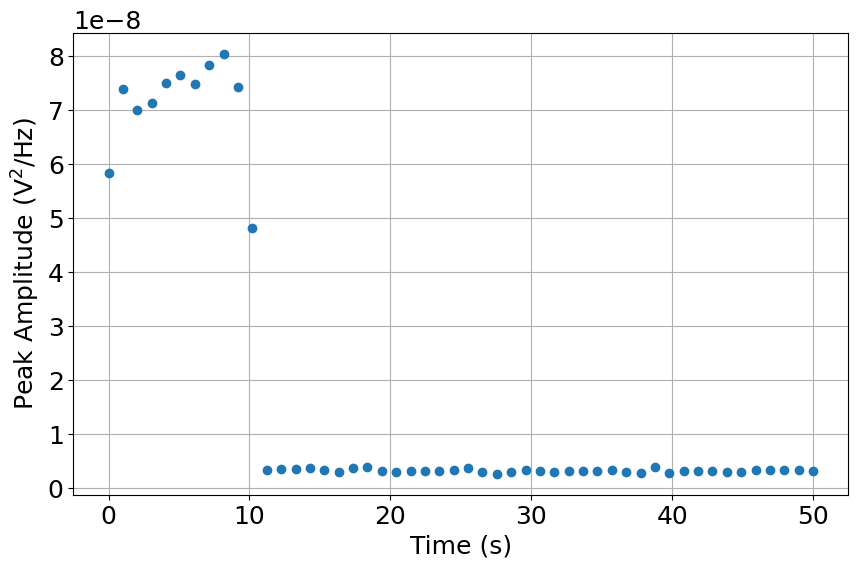

In [60]:
time = np.linspace(0, 50, 50)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
#plt.plot([25, 25], [0, 9*10**(-8)], '--')
#plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.fill_between([10, 40], [0, 0], [8*10])
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 12

In [108]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 12\\Charging.mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

In [109]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*1*10**6:(i+1)*1*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

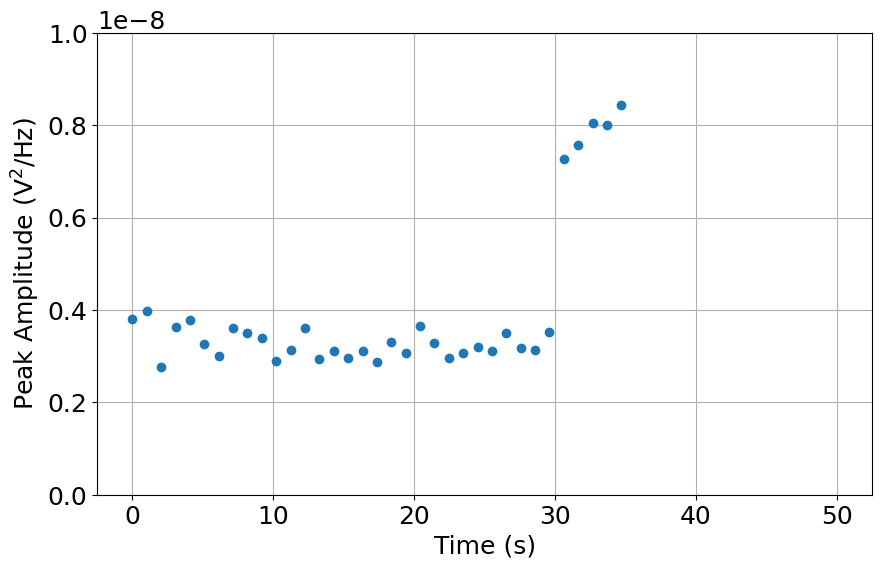

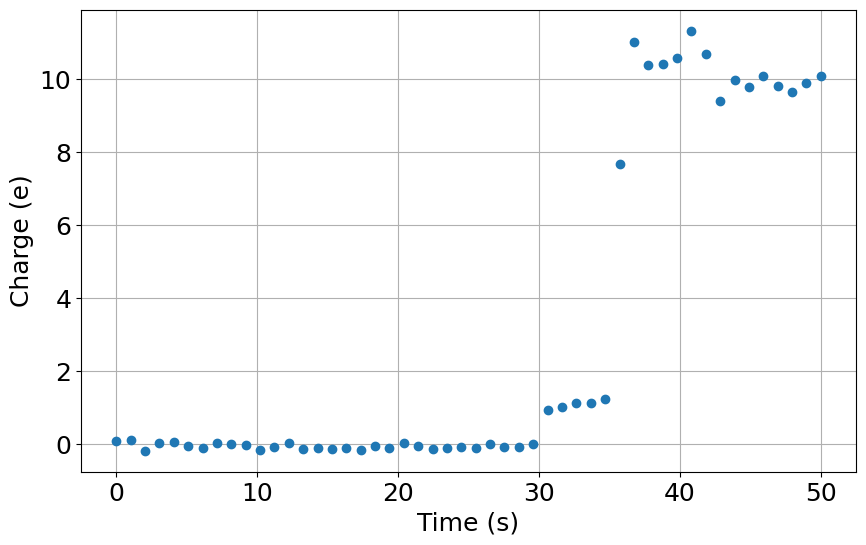

In [110]:
time = np.linspace(0, 50, 50)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
#plt.plot([25, 25], [0, 9*10**(-8)], '--')
#plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
plt.ylim(0, 1*10**(-8))
plt.show()

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, (np.array(sig)- 3.5*10**(-9))/(4*10**(-9)), 'o')
#plt.plot([25, 25], [0, 9*10**(-8)], '--')
#plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Charge (e)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 13

In [85]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 13\\Charging.mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

In [86]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*1*10**6:(i+1)*1*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

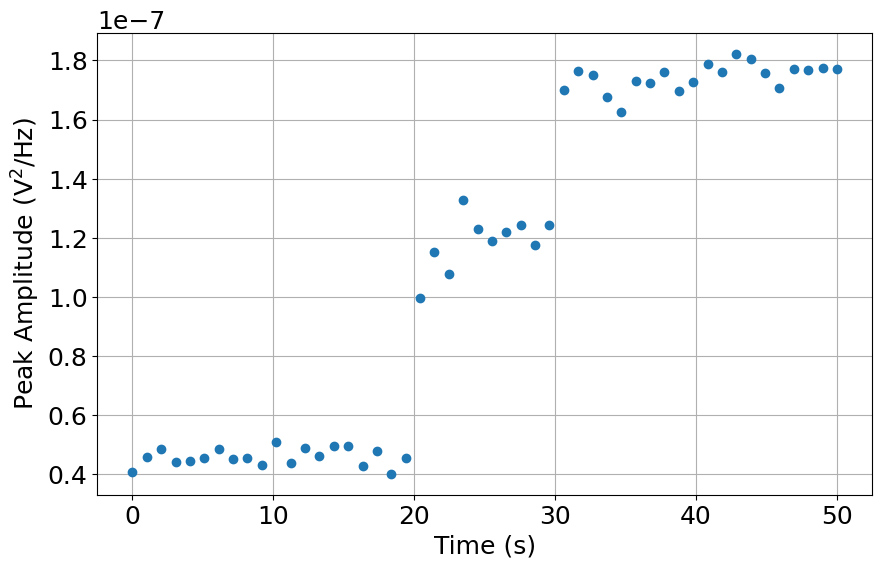

In [87]:
time = np.linspace(0, 50, 50)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
#plt.plot([25, 25], [0, 9*10**(-8)], '--')
#plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 14

In [100]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 14\\Charging.mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

In [101]:
PSDlist = []
sig = []
for i in range(100):
    PSDtmp = scisig.welch(signal1[i*5*10**5:(i+1)*5*10**5], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

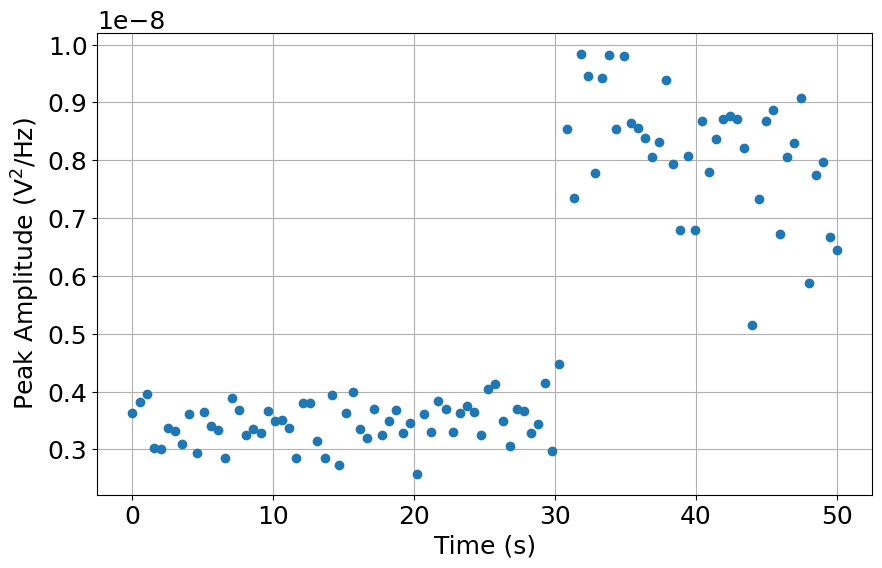

In [102]:
time = np.linspace(0, 50, 100)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
#plt.plot([25, 25], [0, 9*10**(-8)], '--')
#plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 15

In [111]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 15\\Charging.mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

In [112]:
PSDlist = []
sig = []
for i in range(100):
    PSDtmp = scisig.welch(signal1[i*5*10**5:(i+1)*5*10**5], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

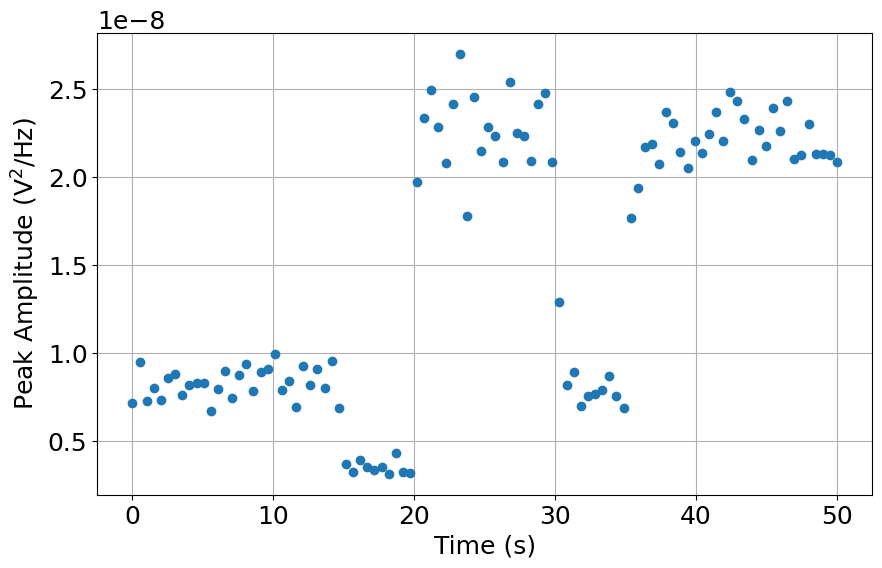

In [113]:
time = np.linspace(0, 50, 100)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
#plt.plot([25, 25], [0, 9*10**(-8)], '--')
#plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

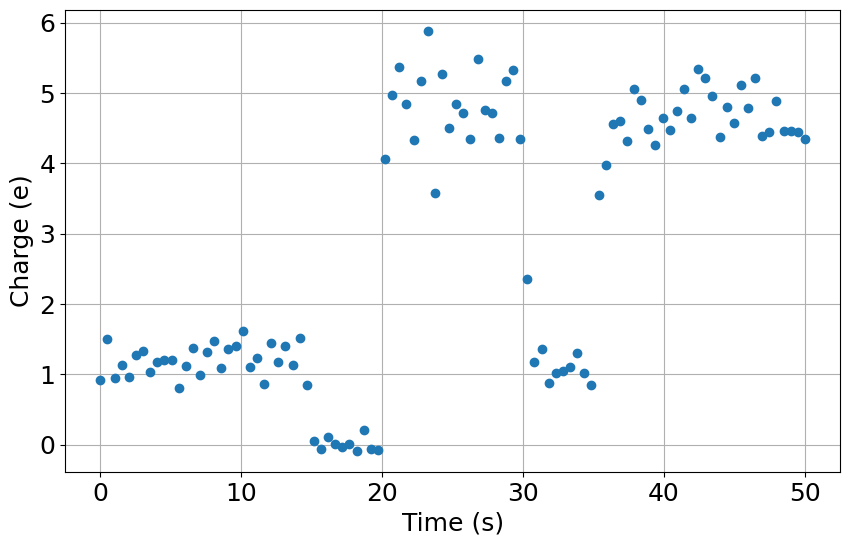

In [114]:
plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, (np.array(sig)- 3.5*10**(-9))/(4*10**(-9)), 'o')
#plt.plot([25, 25], [0, 9*10**(-8)], '--')
#plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Charge (e)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

# Attempt 16

In [115]:
data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 16\\Charging (1).mat')
signal1 = np.transpose(data['B'])[0]
signal2 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 16\\Charging (2).mat')
signal3 = np.transpose(data['B'])[0]
signal4 = np.transpose(data['D'])[0]

data = sio.loadmat('C:\\Users\\Tom\\Documents\\Yale\\data\\Nanosphere\\230118\\Attempt 16\\Charging (3).mat')
signal5 = np.transpose(data['B'])[0]
signal6 = np.transpose(data['D'])[0]

In [116]:
PSDlist = []
sig = []
for i in range(50):
    PSDtmp = scisig.welch(signal1[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal3[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])
    
for i in range(50):
    PSDtmp = scisig.welch(signal5[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**4)
    PSDlist.append(PSDtmp[1])
    sig.append(PSDtmp[1][420])

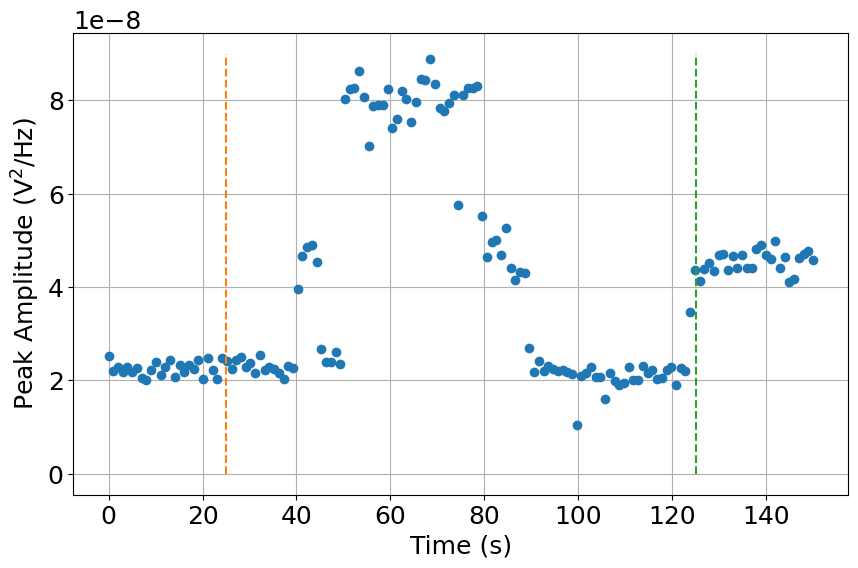

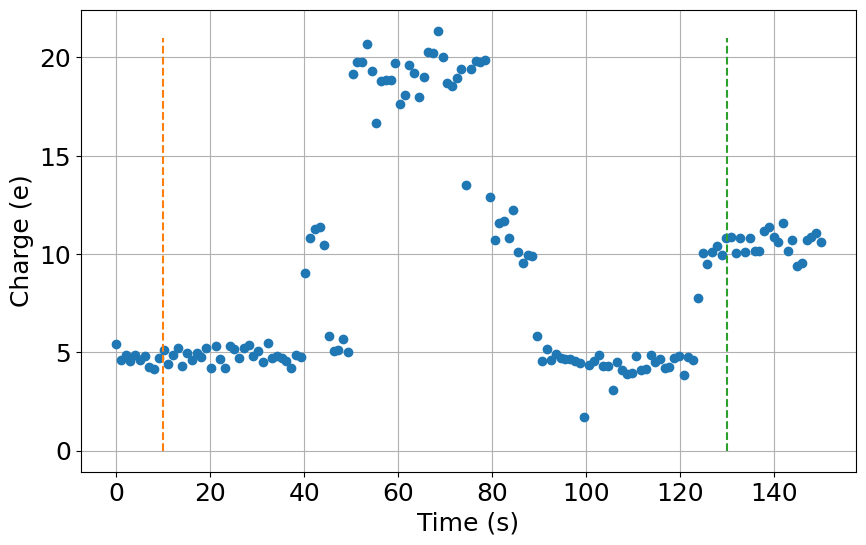

In [120]:
time = np.linspace(0, 150, 150)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, np.array(sig), 'o')
plt.plot([25, 25], [0, 9*10**(-8)], '--')
plt.plot([125, 125], [0, 9*10**(-8)], '--')
plt.ylabel('Peak Amplitude (V$^2$/Hz)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()

time = np.linspace(0, 150, 150)

plt.rc('font', size = 18)
plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(time, (np.array(sig)- 3.5*10**(-9))/(4*10**(-9)), 'o')
plt.plot([10, 10], [0, 21], '--')
plt.plot([130, 130], [0, 21], '--')
plt.ylabel('Charge (e)')
plt.xlabel('Time (s)')
#plt.ylim(0, 2*10**(-8))
plt.show()